---
# <span style= "color:orange" > Fraud | Anomaly Detection and Analysis </span>
---

## <span style= "color:blue">Project Synopsis </span>
---

This project is an analysis of fraud detection in **banking transactions.** It gives an overview of the different methods and techniques used for fraud detection, and also provides a case study of fraud detection in a real-world banking dataset that was chosen from **kaggle test data.** The report uses a real-world banking dataset to identify fraudulent patterns. The report also uses the <b><span style="color:blue">Isolation Forest algorithm</span></b>, a machine learning technique, to detect **5565 fraudulent transactions.** The model's ability to pick out these anomalies demonstrates the power of machine learning in **safeguarding financial systems.**

**Importing the Dependencies**
---

In [1]:
import pandas as pd
import numpy as np


**Loading the Data**
---

In [2]:
data = pd.read_excel('C:/Users/Collins PC/Downloads/bank/transactions.xlsx')

In [3]:
data

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
0,409000611074',2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,NaN,1000000.0,1.000000e+06,.
1,409000611074',2017-07-05,TRF FROM Indiaforensic SERVICES,NaN,2017-07-05,NaN,1000000.0,2.000000e+06,.
2,409000611074',2017-07-18,FDRL/INTERNAL FUND TRANSFE,NaN,2017-07-18,NaN,500000.0,2.500000e+06,.
3,409000611074',2017-08-01,TRF FRM Indiaforensic SERVICES,NaN,2017-08-01,NaN,3000000.0,5.500000e+06,.
4,409000611074',2017-08-16,FDRL/INTERNAL FUND TRANSFE,NaN,2017-08-16,NaN,500000.0,6.000000e+06,.
...,...,...,...,...,...,...,...,...,...
116196,409000362497',2019-03-05,TRF TO 1196428 Indiaforensic SE,NaN,2019-03-05,117934.30,NaN,-1.901902e+09,.
116197,409000362497',2019-03-05,FDRL/INTERNAL FUND TRANSFE,NaN,2019-03-05,NaN,300000.0,-1.901602e+09,.
116198,409000362497',2019-03-05,FDRL/INTERNAL FUND TRANSFE,NaN,2019-03-05,NaN,300000.0,-1.901302e+09,.
116199,409000362497',2019-03-05,IMPS 05-03-20194C,NaN,2019-03-05,109868.65,NaN,-1.901412e+09,.


**Inspecting the Data**
---

<h4><span style="color:brown"><b></b>Fraud Detection in Banking Transactions</b></span></h4>

This project focuses on <span style="color:blue">fraud detection and analysis</span> using a dataset of **116,201 banking transactions.** The dataset includes <span style="color:blue">key financial attributes</span> such as **transaction details, withdrawal and deposit amounts, balance amounts**, and check numbers (CHQ.NO.), with **timestamps** for each transaction.

<b><span style="color:blue">Key Observations:</span></b>

The dataset contains missing values, particularly in the CHQ.NO. (99.2% missing), WITHDRAWAL AMT (46% missing), and DEPOSIT AMT (54% missing) columns, indicating that **not all transactions involve check payments, withdrawals, or deposits.**

The data includes both **numerical and categorical features**, requiring **preprocessing** for effective fraud detection.

The presence of datetime fields (DATE and VALUE DATE) allows for **time-based analysis** of transaction patterns.

<b><span style="color:blue">Approach:</span></b>

**Data Cleaning & Preprocessing:** 

Handling missing values and ensuring data consistency.

**Exploratory Data Analysis (EDA):** 

Identifying patterns and potential anomalies in transaction behaviors.

**Fraud Detection with Machine Learning:**

Implementing the <span style="color:blue">Isolation Forest algorithm</span> to **detect anomalies** in <span style="color:blue">withdrawal and deposits transactions</span>, classifying them as fraudulent or legitimate based on spending patterns.

**Outcome & Impact:**

By leveraging <b><span style="color:blue">unsupervised machine learning</span></b>, this project enhances **fraud detection capabilities in financial transactions**, helping banks and financial institutions proactively identify <span style="color:blue">suspicious activities and improve security measures.</span>









In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116201 entries, 0 to 116200
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Account No           116201 non-null  object        
 1   DATE                 116201 non-null  datetime64[ns]
 2   TRANSACTION DETAILS  113702 non-null  object        
 3   CHQ.NO.              905 non-null     float64       
 4   VALUE DATE           116201 non-null  datetime64[ns]
 5   WITHDRAWAL AMT       53549 non-null   float64       
 6   DEPOSIT AMT          62652 non-null   float64       
 7   BALANCE AMT          116201 non-null  float64       
 8   .                    116201 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 8.0+ MB


The code data.isnull().sum().sort_values(ascending=False) is checking for missing values in each column of the dataset. It counts the number of missing (null) values for each column and sorts them in descending order to highlight the most affected columns.

<b><span style="color:blue">Insights</span></b>

The output reveals that the CHQ.NO. column has the highest number of missing values (115,296 out of 116,201 transactions), followed by WITHDRAWAL AMT (62,652) and DEPOSIT AMT (53,549). This suggests that not all transactions involve check numbers, withdrawals, or deposits. Meanwhile, columns like Account No, DATE, VALUE DATE, and BALANCE AMT have no missing values, meaning they contain complete data for every transaction.

In [5]:
# Check Missing Values
data.isnull().sum().sort_values(ascending = False)

CHQ.NO.                115296
WITHDRAWAL AMT          62652
DEPOSIT AMT             53549
TRANSACTION DETAILS      2499
Account No                  0
DATE                        0
VALUE DATE                  0
BALANCE AMT                 0
.                           0
dtype: int64

In [6]:
print(f"Records: {data.shape[0]}")
print(f"Columns: {data.shape[1]}")


Records: 116201
Columns: 9


In [7]:
data['BALANCE AMT'].sum()

-163245212010848.06

In [8]:
data['DEPOSIT AMT'].sum()

238490215323.50003

In [9]:
data['WITHDRAWAL AMT'].sum()

240391632284.76004

**Bank Balance Report**
---

A negative bank balance of **-163,245,212,010,848.06 (approximately -163 trillion)** indicates a **major financial discrepancy** in the banking data. 

***Here’s what this could mean:***


**Possible Causes:**

**<span style='color:blue'>Data Corruption or System Error</span>**

Incorrect calculations, missing deposits, or duplicated withdrawals.
Incorrect data types causing misinterpretations in the balance calculations.

**<span style='color:blue'>Large-Scale Fraud or Mismanagement</span>**

Unauthorized transactions or unrecorded credits.
Potential fraudulent activity where withdrawals exceed available funds.

**<span style='color:blue'>Reversed Transactions Not Reflected</span>**

Deposits may have been reversed or not correctly recorded, causing a massive deficit.

**<span style='color:blue'>Incorrect Opening Balances</span>**

If starting balances were incorrect, every transaction afterward would be skewed.
Banking System Failure

A system bug may have miscalculated balances over time.

Next Steps:

✅ Check Data Integrity – Ensure all deposits and withdrawals are recorded correctly.

✅ Investigate Transactions – Look for unusually large withdrawals or missing deposits.

✅ Check for Duplicates – Verify if transactions are duplicated.

✅ Verify Account Balances – Compare with real bank statements to spot discrepancies.

**Handle Missing Values**
---

In [10]:
# Fill NaN values with 0
data.fillna(0, inplace=True)

In [11]:
data

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
0,409000611074',2017-06-29,TRF FROM Indiaforensic SERVICES,0.0,2017-06-29,0.00,1000000.0,1.000000e+06,.
1,409000611074',2017-07-05,TRF FROM Indiaforensic SERVICES,0.0,2017-07-05,0.00,1000000.0,2.000000e+06,.
2,409000611074',2017-07-18,FDRL/INTERNAL FUND TRANSFE,0.0,2017-07-18,0.00,500000.0,2.500000e+06,.
3,409000611074',2017-08-01,TRF FRM Indiaforensic SERVICES,0.0,2017-08-01,0.00,3000000.0,5.500000e+06,.
4,409000611074',2017-08-16,FDRL/INTERNAL FUND TRANSFE,0.0,2017-08-16,0.00,500000.0,6.000000e+06,.
...,...,...,...,...,...,...,...,...,...
116196,409000362497',2019-03-05,TRF TO 1196428 Indiaforensic SE,0.0,2019-03-05,117934.30,0.0,-1.901902e+09,.
116197,409000362497',2019-03-05,FDRL/INTERNAL FUND TRANSFE,0.0,2019-03-05,0.00,300000.0,-1.901602e+09,.
116198,409000362497',2019-03-05,FDRL/INTERNAL FUND TRANSFE,0.0,2019-03-05,0.00,300000.0,-1.901302e+09,.
116199,409000362497',2019-03-05,IMPS 05-03-20194C,0.0,2019-03-05,109868.65,0.0,-1.901412e+09,.


**Cleaning the data**
---

In [12]:
# Clean account number
data['Account No'] = data['Account No'].astype(str).str.replace("'", "")

**Check For Duplicate Records**
---

In [13]:
# Detect duplicate transactions (same date, same deposit amount, same account)
duplicate_records = data[data.duplicated(subset=['Account No', 'DATE', 'WITHDRAWAL AMT','DEPOSIT AMT'], keep=False)]
duplicate_records

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
4,409000611074,2017-08-16,FDRL/INTERNAL FUND TRANSFE,0.0,2017-08-16,0.0,500000.0,6.000000e+06,.
5,409000611074,2017-08-16,FDRL/INTERNAL FUND TRANSFE,0.0,2017-08-16,0.0,500000.0,6.500000e+06,.
6,409000611074,2017-08-16,FDRL/INTERNAL FUND TRANSFE,0.0,2017-08-16,0.0,500000.0,7.000000e+06,.
7,409000611074,2017-08-16,FDRL/INTERNAL FUND TRANSFE,0.0,2017-08-16,0.0,500000.0,7.500000e+06,.
8,409000611074,2017-08-16,FDRL/INTERNAL FUND TRANSFE,0.0,2017-08-16,0.0,500000.0,8.000000e+06,.
...,...,...,...,...,...,...,...,...,...
116184,409000362497,2019-03-05,FDRL/INTERNAL FUND TRANSFE,0.0,2019-03-05,0.0,1000000.0,-1.898906e+09,.
116185,409000362497,2019-03-05,FDRL/INTERNAL FUND TRANSFE,0.0,2019-03-05,0.0,1000000.0,-1.897906e+09,.
116186,409000362497,2019-03-05,FDRL/INTERNAL FUND TRANSFE,0.0,2019-03-05,0.0,1000000.0,-1.896906e+09,.
116197,409000362497,2019-03-05,FDRL/INTERNAL FUND TRANSFE,0.0,2019-03-05,0.0,300000.0,-1.901602e+09,.


In [14]:
duplicate_records['WITHDRAWAL AMT'].sum()

99783005309.12999

In [15]:
duplicate_records['DEPOSIT AMT'].sum()

125808635371.70999

**Investigate NaN Values in Transaction Details**
---

In [16]:
NaN_Values = duplicate_records[duplicate_records['TRANSACTION DETAILS']==0]

In [17]:
NaN_Values

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
30345,1196711,2015-10-29,0,0.0,2015-10-29,0.0,5000000.0,-1.475274e+09,.
30346,1196711,2015-10-29,0,0.0,2015-10-29,0.0,5000000.0,-1.470274e+09,.
30584,1196711,2015-11-07,0,0.0,2015-11-07,0.0,10000000.0,-1.557015e+09,.
30585,1196711,2015-11-07,0,0.0,2015-11-07,0.0,10000000.0,-1.547015e+09,.
31192,1196711,2015-12-03,0,0.0,2015-12-03,0.0,10000000.0,-1.544866e+09,.
...,...,...,...,...,...,...,...,...,...
97686,409000362497,2016-09-16,0,0.0,2016-09-16,0.0,15000000.0,-1.637700e+09,.
97687,409000362497,2016-09-16,0,0.0,2016-09-16,0.0,15000000.0,-1.622700e+09,.
97781,409000362497,2016-09-20,0,0.0,2016-09-20,0.0,15000000.0,-1.690846e+09,.
97782,409000362497,2016-09-20,0,0.0,2016-09-20,0.0,15000000.0,-1.675846e+09,.


In [18]:
NaN_Values['WITHDRAWAL AMT'].sum()

0.0

In [19]:
NaN_Values['DEPOSIT AMT'].sum()

29840000000.0

In [20]:
NaN_Data = data[data['TRANSACTION DETAILS']==0]
NaN_Data

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
30345,1196711,2015-10-29,0,0.0,2015-10-29,0.0,5000000.0,-1.475274e+09,.
30346,1196711,2015-10-29,0,0.0,2015-10-29,0.0,5000000.0,-1.470274e+09,.
30584,1196711,2015-11-07,0,0.0,2015-11-07,0.0,10000000.0,-1.557015e+09,.
30585,1196711,2015-11-07,0,0.0,2015-11-07,0.0,10000000.0,-1.547015e+09,.
31192,1196711,2015-12-03,0,0.0,2015-12-03,0.0,10000000.0,-1.544866e+09,.
...,...,...,...,...,...,...,...,...,...
97686,409000362497,2016-09-16,0,0.0,2016-09-16,0.0,15000000.0,-1.637700e+09,.
97687,409000362497,2016-09-16,0,0.0,2016-09-16,0.0,15000000.0,-1.622700e+09,.
97781,409000362497,2016-09-20,0,0.0,2016-09-20,0.0,15000000.0,-1.690846e+09,.
97782,409000362497,2016-09-20,0,0.0,2016-09-20,0.0,15000000.0,-1.675846e+09,.


In [21]:
NaN_Data['DEPOSIT AMT'].sum()

30497000000.0

In [22]:
NaN_Data['WITHDRAWAL AMT'].sum()

0.0

In [23]:
NaN_Non_Duplicate_Total = NaN_Data['DEPOSIT AMT'].sum() - NaN_Values['DEPOSIT AMT'].sum()
NaN_Non_Duplicate_Total

657000000.0

In [24]:
NaN_Data['Account No'].value_counts()

Account No
409000362497    2484
1196711           15
Name: count, dtype: int64

In [25]:
NaN_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499 entries, 30345 to 97783
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Account No           2499 non-null   object        
 1   DATE                 2499 non-null   datetime64[ns]
 2   TRANSACTION DETAILS  2499 non-null   object        
 3   CHQ.NO.              2499 non-null   float64       
 4   VALUE DATE           2499 non-null   datetime64[ns]
 5   WITHDRAWAL AMT       2499 non-null   float64       
 6   DEPOSIT AMT          2499 non-null   float64       
 7   BALANCE AMT          2499 non-null   float64       
 8   .                    2499 non-null   object        
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 195.2+ KB


In [26]:
NaN_Data

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
30345,1196711,2015-10-29,0,0.0,2015-10-29,0.0,5000000.0,-1.475274e+09,.
30346,1196711,2015-10-29,0,0.0,2015-10-29,0.0,5000000.0,-1.470274e+09,.
30584,1196711,2015-11-07,0,0.0,2015-11-07,0.0,10000000.0,-1.557015e+09,.
30585,1196711,2015-11-07,0,0.0,2015-11-07,0.0,10000000.0,-1.547015e+09,.
31192,1196711,2015-12-03,0,0.0,2015-12-03,0.0,10000000.0,-1.544866e+09,.
...,...,...,...,...,...,...,...,...,...
97686,409000362497,2016-09-16,0,0.0,2016-09-16,0.0,15000000.0,-1.637700e+09,.
97687,409000362497,2016-09-16,0,0.0,2016-09-16,0.0,15000000.0,-1.622700e+09,.
97781,409000362497,2016-09-20,0,0.0,2016-09-20,0.0,15000000.0,-1.690846e+09,.
97782,409000362497,2016-09-20,0,0.0,2016-09-20,0.0,15000000.0,-1.675846e+09,.


**Undefined Customer Transactions**
---

In [27]:
undefined_customers = NaN_Data[(NaN_Data['Account No'] == '409000362497') | (NaN_Data['Account No'] == '1196711')]
undefined_customers

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
30345,1196711,2015-10-29,0,0.0,2015-10-29,0.0,5000000.0,-1.475274e+09,.
30346,1196711,2015-10-29,0,0.0,2015-10-29,0.0,5000000.0,-1.470274e+09,.
30584,1196711,2015-11-07,0,0.0,2015-11-07,0.0,10000000.0,-1.557015e+09,.
30585,1196711,2015-11-07,0,0.0,2015-11-07,0.0,10000000.0,-1.547015e+09,.
31192,1196711,2015-12-03,0,0.0,2015-12-03,0.0,10000000.0,-1.544866e+09,.
...,...,...,...,...,...,...,...,...,...
97686,409000362497,2016-09-16,0,0.0,2016-09-16,0.0,15000000.0,-1.637700e+09,.
97687,409000362497,2016-09-16,0,0.0,2016-09-16,0.0,15000000.0,-1.622700e+09,.
97781,409000362497,2016-09-20,0,0.0,2016-09-20,0.0,15000000.0,-1.690846e+09,.
97782,409000362497,2016-09-20,0,0.0,2016-09-20,0.0,15000000.0,-1.675846e+09,.


In [28]:
customer_deposit_sums = undefined_customers.groupby("Account No", as_index=False)["DEPOSIT AMT"].sum()
customer_deposit_sums

,Account No,DEPOSIT AMT
0,1196711,1.310000e+08
1,409000362497,3.036600e+10


Account holder **1196711** has deposited **131 million**, while account **409000362497** has accumulated **30.37 billion** in deposits. The significant difference in deposit amounts suggests varying transaction volumes, with the latter account handling substantially larger sums.

The transaction details for accounts 1196711 and 409000362497 are missing (NaN), which means we lack information on the nature or purpose of these deposits. This raises concerns about transparency, as transaction details typically help identify sources, recipients, or reasons for transfers. The absence of this data could indicate poor record-keeping, intentional obfuscation, or system errors, which may hinder audits, compliance checks, and fraud investigations.

In [29]:
customer_withdrawal_sums = undefined_customers.groupby("Account No", as_index=False)["WITHDRAWAL AMT"].sum()
customer_withdrawal_sums

,Account No,WITHDRAWAL AMT
0,1196711,0.0
1,409000362497,0.0


**undefined customer deposits transactions analysis - withdrawals**
---

In [30]:
withdrawals = data[['DATE', 'Account No', 'WITHDRAWAL AMT', 'BALANCE AMT','TRANSACTION DETAILS']]

In [31]:
undefined_customers = withdrawals[(withdrawals['Account No']=='409000362497') | (withdrawals['Account No']=='1196711')]

In [32]:
undefined_customers

,DATE,Account No,WITHDRAWAL AMT,BALANCE AMT,TRANSACTION DETAILS
27046,2015-01-01,1196711,0.00,-5.399581e+08,436315014201 - REVERSAL
27047,2015-01-02,1196711,0.00,-5.399551e+08,436418596193 - REVERSAL
27048,2015-01-05,1196711,0.00,-5.399511e+08,435011735270 REV
27049,2015-01-05,1196711,0.00,-5.399481e+08,435518880515 REV
27050,2015-01-05,1196711,0.00,-5.399431e+08,435616996254 REV
...,...,...,...,...,...
116196,2019-03-05,409000362497,117934.30,-1.901902e+09,TRF TO 1196428 Indiaforensic SE
116197,2019-03-05,409000362497,0.00,-1.901602e+09,FDRL/INTERNAL FUND TRANSFE
116198,2019-03-05,409000362497,0.00,-1.901302e+09,FDRL/INTERNAL FUND TRANSFE
116199,2019-03-05,409000362497,109868.65,-1.901412e+09,IMPS 05-03-20194C


In [33]:
customers_withdrawals_sum = undefined_customers.groupby("Account No", as_index=False)["WITHDRAWAL AMT"].sum()
customers_withdrawals_sum

,Account No,WITHDRAWAL AMT
0,1196711,4.692584e+10
1,409000362497,1.019351e+11


The withdrawal amounts for accounts **1196711 and 409000362497 are 46.93 billion and 101.94 billion, respectively**. These figures indicate substantial fund movements, with the latter account handling more than double the withdrawals of the former. Such high transaction volumes, especially without transaction details, could signal potential financial irregularities, necessitating further scrutiny.

In [34]:
undefined_customers['TRANSACTION DETAILS'].value_counts()

TRANSACTION DETAILS
FDRL/INTERNAL FUND TRANSFE          2762
0                                   2499
INTERNAL FUND TRANSFER IN           1763
Indiaforensic SERVICES INDIA PVT    1223
IRCTC CORPORATE OFFICE AC           1076
                                    ... 
IMPS I/W 060815 FOR 3C                 1
IMPS O/W 060815 4C                     1
IMPS I/W 060815 4C                     1
IMPS O/W DTD.06082015 FOR              1
IMPS 05-03-20194C                      1
Name: count, Length: 17800, dtype: int64

**Undefined Customer Transactions Visualisations**
---

**Withdrawals**

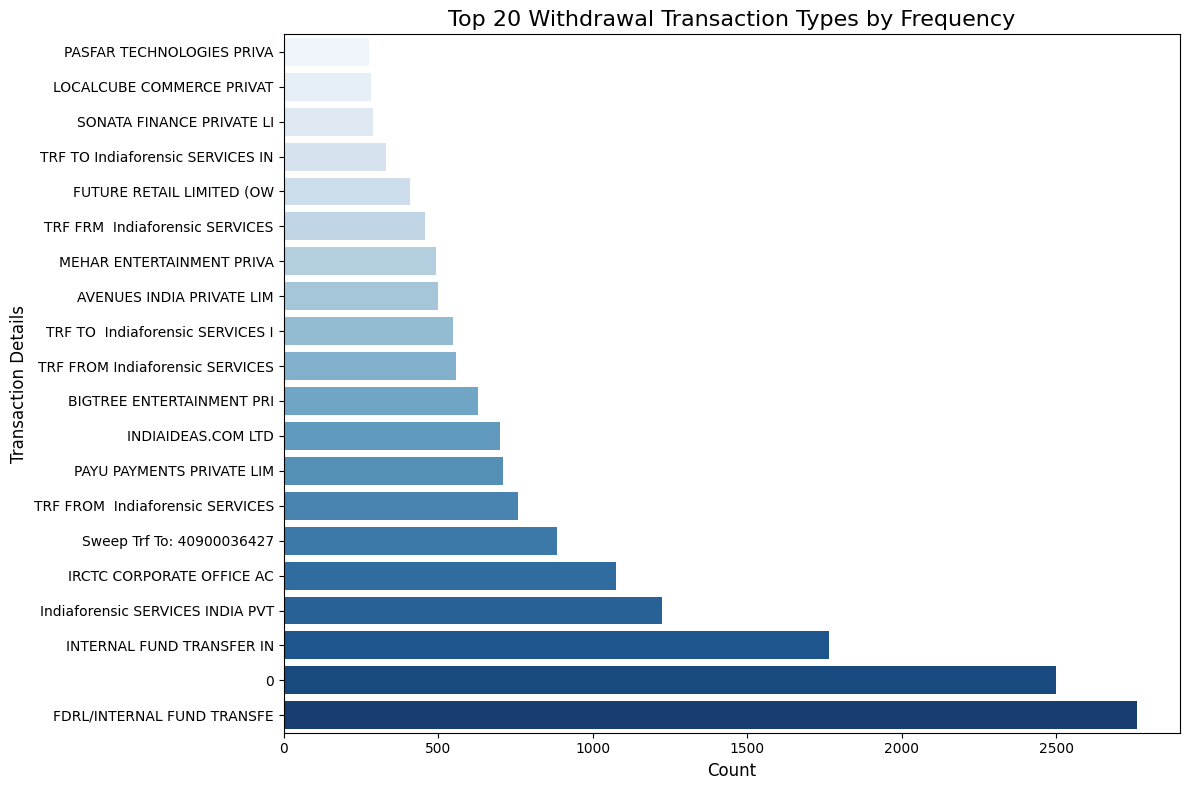

TRANSACTION DETAILS
FDRL/INTERNAL FUND TRANSFE          2762
0                                   2499
INTERNAL FUND TRANSFER IN           1763
Indiaforensic SERVICES INDIA PVT    1223
IRCTC CORPORATE OFFICE AC           1076
                                    ... 
IMPS I/W 060815 FOR 3C                 1
IMPS O/W 060815 4C                     1
IMPS I/W 060815 4C                     1
IMPS O/W DTD.06082015 FOR              1
IMPS 05-03-20194C                      1
Name: count, Length: 17800, dtype: int64


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each transaction type
transaction_counts = undefined_customers['TRANSACTION DETAILS'].value_counts()

# Convert to DataFrame for better handling
transaction_counts_df = transaction_counts.reset_index()
transaction_counts_df.columns = ["TRANSACTION DETAILS", "Count"]

# Sort the DataFrame from highest to lowest count
transaction_counts_df = transaction_counts_df.sort_values(by="Count", ascending=False)

# Plot the distribution
plt.figure(figsize=(12, 8))
sns.barplot(
    data=transaction_counts_df.head(20),  # Display top 20 transaction types
    y="TRANSACTION DETAILS",
    x="Count",
    hue="TRANSACTION DETAILS",  # Assign hue to avoid the FutureWarning
    dodge=False,  # Ensure bars remain aligned
    palette="Blues_r",
    legend=False  # Disable legend to avoid redundancy
)

# Labels and title
plt.xlabel("Count", fontsize=12)
plt.ylabel("Transaction Details", fontsize=12)
plt.title("Top 20 Withdrawal Transaction Types by Frequency", fontsize=16)
plt.gca().invert_yaxis()  # Highest count on top
plt.tight_layout()
plt.show()

# Display the full sorted count list
print(transaction_counts)


<h4><b></b><span style='color:brown'>The Transaction Details Frequency Analysis Report</span></b></h4>


<h5><span style='color:blue'><b>"FDRL/INTERNAL FUND TRANSFE" (2762 occurrences)</span></b></h5>


Meaning: This indicates an internal fund transfer within the same bank (likely Federal Bank, based on "FDRL"). It could be transfers between accounts held by the same customer or within the bank's internal systems.

<b>Fraud Risk: Moderate to High</b> – Internal fund transfers can be used to layer transactions, making it difficult to track illicit movement of funds (e.g., money laundering).



<h5><span style='color:blue'><b>"0" (2499 occurrences)</b></span></b></h5>


Meaning: This could be a data error, placeholder, or a system-generated transaction record with missing or undefined details.

<b>Fraud Risk: High</b> – Transactions with "0" as details are suspicious, as fraudsters might use them to hide transaction origins or exploit system loopholes.


<h5><span style='color:blue'><b>"INTERNAL FUND TRANSFER IN" (1763 occurrences)</span></b></h5>

Meaning: Similar to the first entry, this refers to inward internal fund transfers within the same bank.

<b>Fraud Risk: Moderate to High</b> – Fraudsters often use multiple internal transfers to obscure the source of funds before moving them outside the system.


<h5><span style='color:blue'><b>"Indiaforensic SERVICES INDIA PVT" (1223 occurrences)</span></b></h5>

Meaning: Likely a legitimate company providing forensic accounting and fraud detection services.

<b>Fraud Risk: Low to Moderate</b> – If genuine, this is not fraudulent. However, if this entry is manipulated or used excessively, it could signal fake transactions or shell company activity.


<h5><span style='color:blue'><b>"IRCTC CORPORATE OFFICE AC" (1076 occurrences)</span></b></h5>

Meaning: Likely refers to Indian Railway Catering and Tourism Corporation (IRCTC), the government agency for railway ticketing. These could be ticket payments, refunds, or corporate transactions.

<b>Fraud Risk: Low to Moderate</b> – While IRCTC itself is legitimate, fraud can occur if fake transactions are logged under this name to mask illegal fund movement.


**Can These Transactions Be Used for Fraudulent Activities?**

Yes, especially the internal fund transfers (entries 1 and 3) and the "0" transaction (entry 2). Here’s how:

**Money Laundering**

Fraudsters can cycle money between accounts via internal transfers, making it harder to track its origin.
They may use company names like "Indiaforensic SERVICES" to create fake invoices for non-existent services.
Data Manipulation & System Exploitation

The presence of "0" in transaction details could indicate incomplete logs, which fraudsters may use to conceal suspicious activity.

**Ghost Transactions**

Some transactions may not involve actual money movement but are instead used to inflate account balances or create false transaction histories.
Next Steps for Fraud Detection in Your Dataset
Check for patterns: Repeated high-value internal transfers could be layering in money laundering.
Investigate "0" transactions: If they have unusual withdrawal or deposit amounts, they might be used to bypass fraud detection.
Compare transaction frequency: If a particular entity (e.g., "Indiaforensic SERVICES") appears excessively, verify its legitimacy.

In [36]:
zero_undefined_customers = undefined_customers[undefined_customers['TRANSACTION DETAILS']==0]
zero_undefined_customers

,DATE,Account No,WITHDRAWAL AMT,BALANCE AMT,TRANSACTION DETAILS
30345,2015-10-29,1196711,0.0,-1.475274e+09,0
30346,2015-10-29,1196711,0.0,-1.470274e+09,0
30584,2015-11-07,1196711,0.0,-1.557015e+09,0
30585,2015-11-07,1196711,0.0,-1.547015e+09,0
31192,2015-12-03,1196711,0.0,-1.544866e+09,0
...,...,...,...,...,...
97686,2016-09-16,409000362497,0.0,-1.637700e+09,0
97687,2016-09-16,409000362497,0.0,-1.622700e+09,0
97781,2016-09-20,409000362497,0.0,-1.690846e+09,0
97782,2016-09-20,409000362497,0.0,-1.675846e+09,0


In [37]:
zero_undefined_customers['WITHDRAWAL AMT'].sum()

0.0

In [38]:
transactions_checks=undefined_customers[(undefined_customers['TRANSACTION DETAILS']=='FDRL/INTERNAL FUND TRANSFE') | (undefined_customers['TRANSACTION DETAILS']=='INTERNAL FUND TRANSFER IN') | (undefined_customers['TRANSACTION DETAILS']=='Indiaforensic SERVICES INDIA PVT') | (undefined_customers['TRANSACTION DETAILS']=='IRCTC CORPORATE OFFICE AC')]

In [39]:
transactions_checks

,DATE,Account No,WITHDRAWAL AMT,BALANCE AMT,TRANSACTION DETAILS
27118,2015-06-30,1196711,2000000.0,-8.865557e+08,INTERNAL FUND TRANSFER IN
27244,2015-07-16,1196711,10000000.0,-9.646359e+08,INTERNAL FUND TRANSFER IN
27245,2015-07-16,1196711,10000000.0,-9.746359e+08,INTERNAL FUND TRANSFER IN
27246,2015-07-16,1196711,10000000.0,-9.846359e+08,INTERNAL FUND TRANSFER IN
27247,2015-07-16,1196711,10000000.0,-9.946359e+08,INTERNAL FUND TRANSFER IN
...,...,...,...,...,...
116184,2019-03-05,409000362497,0.0,-1.898906e+09,FDRL/INTERNAL FUND TRANSFE
116185,2019-03-05,409000362497,0.0,-1.897906e+09,FDRL/INTERNAL FUND TRANSFE
116186,2019-03-05,409000362497,0.0,-1.896906e+09,FDRL/INTERNAL FUND TRANSFE
116197,2019-03-05,409000362497,0.0,-1.901602e+09,FDRL/INTERNAL FUND TRANSFE


In [40]:
tcheck_withdrawals_sum = transactions_checks.groupby("Account No", as_index=False)["WITHDRAWAL AMT"].sum()
tcheck_withdrawals_sum

,Account No,WITHDRAWAL AMT
0,1196711,2.236595e+10
1,409000362497,2.376529e+09


**Account 1196711 recorded a withdrawal** of approximately **22.37 billion**, while account **409000362497 had a withdrawal of 2.38 billion**. Such unusually large transactions could indicate potential fraudulent activity, errors in data entry, or high-volume institutional transfers. Further investigation is required to verify their legitimacy.

**Checking for Duplicate Records**
---

In [41]:
# Detect duplicate transactions (same date, same deposit amount, same account)
duplicate_transaction_checks = transactions_checks[transactions_checks.duplicated(subset=['Account No', 'DATE', 'WITHDRAWAL AMT'], keep=False)]
duplicate_transaction_checks 

,DATE,Account No,WITHDRAWAL AMT,BALANCE AMT,TRANSACTION DETAILS
27244,2015-07-16,1196711,10000000.0,-9.646359e+08,INTERNAL FUND TRANSFER IN
27245,2015-07-16,1196711,10000000.0,-9.746359e+08,INTERNAL FUND TRANSFER IN
27246,2015-07-16,1196711,10000000.0,-9.846359e+08,INTERNAL FUND TRANSFER IN
27247,2015-07-16,1196711,10000000.0,-9.946359e+08,INTERNAL FUND TRANSFER IN
27248,2015-07-16,1196711,8000000.0,-1.002636e+09,INTERNAL FUND TRANSFER IN
...,...,...,...,...,...
116184,2019-03-05,409000362497,0.0,-1.898906e+09,FDRL/INTERNAL FUND TRANSFE
116185,2019-03-05,409000362497,0.0,-1.897906e+09,FDRL/INTERNAL FUND TRANSFE
116186,2019-03-05,409000362497,0.0,-1.896906e+09,FDRL/INTERNAL FUND TRANSFE
116197,2019-03-05,409000362497,0.0,-1.901602e+09,FDRL/INTERNAL FUND TRANSFE


In [42]:
duplicate_withdrawals_sum = duplicate_transaction_checks.groupby("Account No", as_index=False)["WITHDRAWAL AMT"].sum()
duplicate_withdrawals_sum

,Account No,WITHDRAWAL AMT
0,1196711,2.086130e+10
1,409000362497,2.137120e+05


Based on the highlighted transaction details :

**<h6><em>FDRL/INTERNAL FUND TRANSFE, INTERNAL FUND TRANSFER IN, Indiaforensic SERVICES INDIA PVT, IRCTC CORPORATE OFFICE AC<em></h6>**

**<li>Account 1196711 has cumulative duplicate withdrawals totaling 20.86 billion.</li>**
**<li>Account 409000362497 has cumulative duplicate withdrawals of 213,712.</li>**

The high duplicate withdrawal amount for **Account 1196711** raises concerns about potential errors as far as the highlighted transactions are concerned, fraud, or unusual transaction patterns that require further investigation.

In [43]:
duplicate_undefined_customers_general = undefined_customers[undefined_customers.duplicated(subset=['Account No', 'DATE', 'WITHDRAWAL AMT'], keep=False)]
duplicate_undefined_customers_general

,DATE,Account No,WITHDRAWAL AMT,BALANCE AMT,TRANSACTION DETAILS
27048,2015-01-05,1196711,0.0,-5.399511e+08,435011735270 REV
27049,2015-01-05,1196711,0.0,-5.399481e+08,435518880515 REV
27050,2015-01-05,1196711,0.0,-5.399431e+08,435616996254 REV
27051,2015-01-05,1196711,0.0,-5.399381e+08,436313408210 REV
27052,2015-01-05,1196711,0.0,-5.399331e+08,436410692881 REV
...,...,...,...,...,...
116184,2019-03-05,409000362497,0.0,-1.898906e+09,FDRL/INTERNAL FUND TRANSFE
116185,2019-03-05,409000362497,0.0,-1.897906e+09,FDRL/INTERNAL FUND TRANSFE
116186,2019-03-05,409000362497,0.0,-1.896906e+09,FDRL/INTERNAL FUND TRANSFE
116197,2019-03-05,409000362497,0.0,-1.901602e+09,FDRL/INTERNAL FUND TRANSFE


In [44]:
duplicate_general_withdrawals_sum = duplicate_undefined_customers_general.groupby("Account No", as_index=False)["WITHDRAWAL AMT"].sum()
duplicate_general_withdrawals_sum

,Account No,WITHDRAWAL AMT
0,1196711,3.981292e+10
1,409000362497,3.634611e+08


This are all duplicated withdrawal transactions involving the two accounts, without filtering for specific transaction details.

<li><b>Account 1196711 has duplicated total withdrawal amounts of 39.81 billion.</b></li>
<li><b>Account 409000362497 has duplicate amounts totaling 363.46 million.</b></li>
These figures highlight potential anomalies, requiring further investigation to determine if they result from system errors, duplicate processing, or fraudulent activities.

**Visualisation for Duplicate Transactions (Highlighted Account Transaction Details)**
---

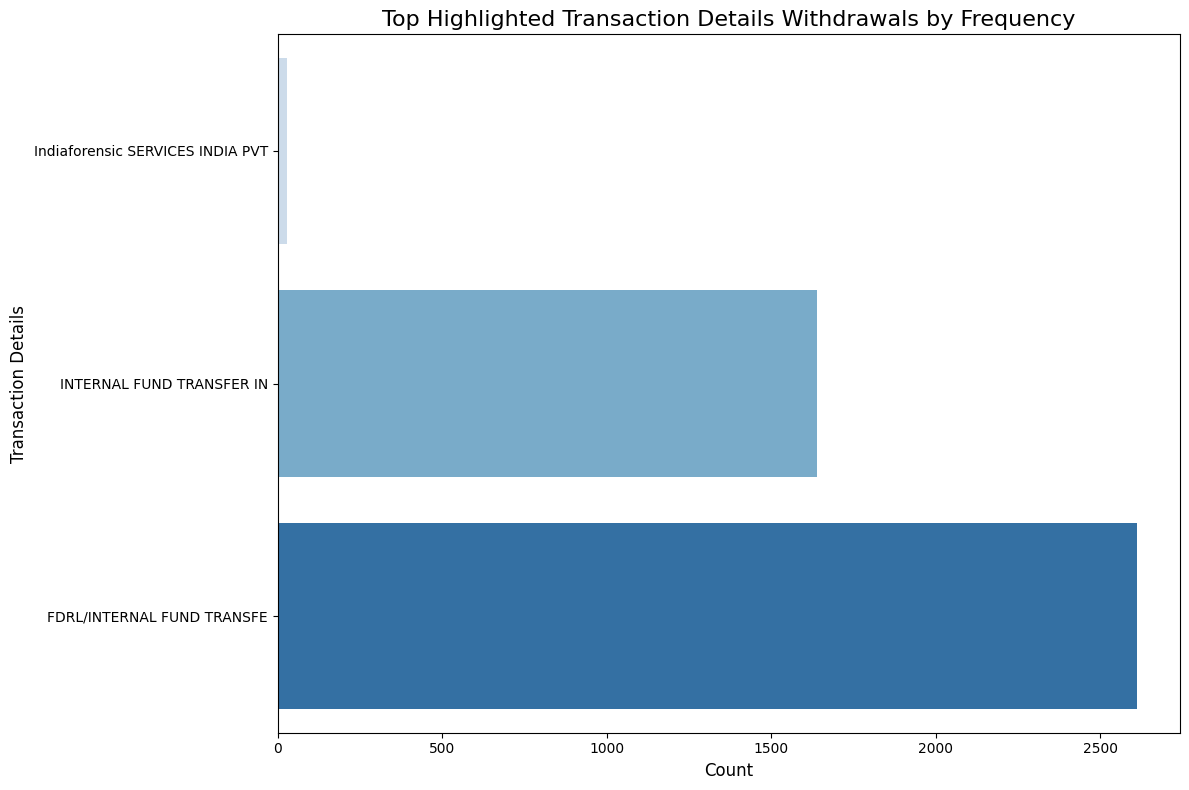

TRANSACTION DETAILS
FDRL/INTERNAL FUND TRANSFE          2611
INTERNAL FUND TRANSFER IN           1640
Indiaforensic SERVICES INDIA PVT      30
Name: count, dtype: int64


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each transaction type
transaction_counts = duplicate_transaction_checks['TRANSACTION DETAILS'].value_counts()

# Convert to DataFrame for better handling
transaction_counts_df = transaction_counts.reset_index()
transaction_counts_df.columns = ["TRANSACTION DETAILS", "Count"]

# Sort the DataFrame from highest to lowest count
transaction_counts_df = transaction_counts_df.sort_values(by="Count", ascending=False)

# Plot the distribution
plt.figure(figsize=(12, 8))
sns.barplot(
    data=transaction_counts_df.head(10),  # Display top 20 transaction types
    y="TRANSACTION DETAILS",
    x="Count",
    hue="TRANSACTION DETAILS",  # Assign hue to avoid the FutureWarning
    dodge=False,  # Ensure bars remain aligned
    palette="Blues_r",
    legend=False  # Disable legend to avoid redundancy
)

# Labels and title
plt.xlabel("Count", fontsize=12)
plt.ylabel("Transaction Details", fontsize=12)
plt.title("Top Highlighted Transaction Details Withdrawals by Frequency", fontsize=16)
plt.gca().invert_yaxis()  # Highest count on top
plt.tight_layout()
plt.show()

# Display the full sorted count list
print(transaction_counts)


<b>Visualisation for Duplicate Transactions Generally for Accounts (1196711 and 409000362497) - undefined customer deposits </b>
---

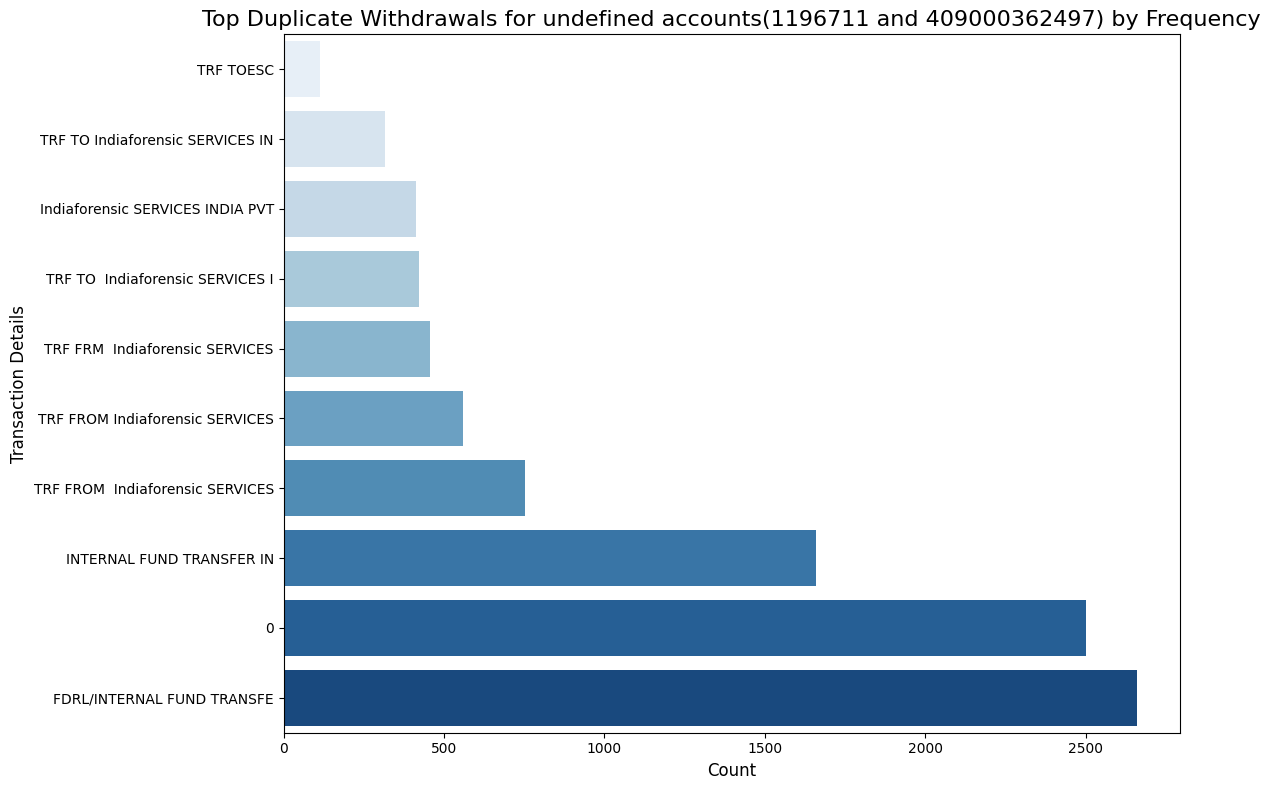

TRANSACTION DETAILS
FDRL/INTERNAL FUND TRANSFE          2660
0                                   2499
INTERNAL FUND TRANSFER IN           1659
TRF FROM  Indiaforensic SERVICES     752
TRF FROM Indiaforensic SERVICES      559
                                    ... 
NEFT/AXISF16251076457/Indfor           1
RTGS/ICICH16252206680/Indfor           1
NEFT/AXISF16252007483/Indfor           1
NEFT/AXISF16252007454/Indfor           1
NEFT/SBIN619063713746/Indfor           1
Name: count, Length: 12072, dtype: int64


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each transaction type
transaction_counts = duplicate_undefined_customers_general['TRANSACTION DETAILS'].value_counts()

# Convert to DataFrame for better handling
transaction_counts_df = transaction_counts.reset_index()
transaction_counts_df.columns = ["TRANSACTION DETAILS", "Count"]

# Sort the DataFrame from highest to lowest count
transaction_counts_df = transaction_counts_df.sort_values(by="Count", ascending=False)

# Plot the distribution
plt.figure(figsize=(12, 8))
sns.barplot(
    data=transaction_counts_df.head(10),  # Display top 20 transaction types
    y="TRANSACTION DETAILS",
    x="Count",
    hue="TRANSACTION DETAILS",  # Assign hue to avoid the FutureWarning
    dodge=False,  # Ensure bars remain aligned
    palette="Blues_r",
    legend=False  # Disable legend to avoid redundancy
)

# Labels and title
plt.xlabel("Count", fontsize=12)
plt.ylabel("Transaction Details", fontsize=12)
plt.title("Top Duplicate Withdrawals for undefined accounts(1196711 and 409000362497) by Frequency", fontsize=16)
plt.gca().invert_yaxis()  # Highest count on top
plt.tight_layout()
plt.show()

# Display the full sorted count list
print(transaction_counts)


<h4><b><span style = "color:green"> Checking for Fraudulent Transactions </span></b></h4>

**Withdrawals**

In [47]:
import pandas as pd
from datetime import datetime

# Create a copy of the DataFrame to avoid modifying the original slice
withdrawals_general = duplicate_undefined_customers_general.copy()

month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 
                 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Extract Day, Month, and Year into new columns
withdrawals_general.loc[:, 'Day'] = withdrawals_general['DATE'].dt.day
withdrawals_general.loc[:, 'Day Name'] = withdrawals_general['DATE'].dt.day_name()
withdrawals_general.loc[:, 'Month'] = withdrawals_general['DATE'].dt.month
withdrawals_general.loc[:, 'Year'] = withdrawals_general['DATE'].dt.year
withdrawals_general.loc[:, 'Month_Name'] = withdrawals_general['Month'].map(month_mapping)



In [48]:
withdrawals_general

,DATE,Account No,WITHDRAWAL AMT,BALANCE AMT,TRANSACTION DETAILS,Day,Day Name,Month,Year,Month_Name
27048,2015-01-05,1196711,0.0,-5.399511e+08,435011735270 REV,5,Monday,1,2015,January
27049,2015-01-05,1196711,0.0,-5.399481e+08,435518880515 REV,5,Monday,1,2015,January
27050,2015-01-05,1196711,0.0,-5.399431e+08,435616996254 REV,5,Monday,1,2015,January
27051,2015-01-05,1196711,0.0,-5.399381e+08,436313408210 REV,5,Monday,1,2015,January
27052,2015-01-05,1196711,0.0,-5.399331e+08,436410692881 REV,5,Monday,1,2015,January
...,...,...,...,...,...,...,...,...,...,...
116184,2019-03-05,409000362497,0.0,-1.898906e+09,FDRL/INTERNAL FUND TRANSFE,5,Tuesday,3,2019,March
116185,2019-03-05,409000362497,0.0,-1.897906e+09,FDRL/INTERNAL FUND TRANSFE,5,Tuesday,3,2019,March
116186,2019-03-05,409000362497,0.0,-1.896906e+09,FDRL/INTERNAL FUND TRANSFE,5,Tuesday,3,2019,March
116197,2019-03-05,409000362497,0.0,-1.901602e+09,FDRL/INTERNAL FUND TRANSFE,5,Tuesday,3,2019,March


<b><span style = "color:green"> Machine Learning Modelling (Fraud Detection) - Unsupervised Learning </span></b>
---

<h4><b><span style="color:brown">  Fraud Detection Using Isolation Forest</span></b></h4>
                                                                                

<b><span style="color:blue">Overview of the Isolation Forest Algorithm</span></b>


<p><span style="color:blue"> The Isolation Forest (IF) algorithm</span> is an <b>unsupervised machine learning technique</b> designed for anomaly detection. Unlike traditional classification models, which require labeled data, Isolation Forest <b>excels in detecting outliers</b> without prior knowledge of fraudulent transactions. This makes it a powerful tool for fraud detection, cybersecurity, and fault detection in various industries.</p>

Isolation Forest works by **randomly partitioning the dataset** and **isolating anomalies** through **decision trees.** Since anomalies are **rare and different** from the **majority** of the data, they tend to be isolated much **faster** than normal instances. The model assigns a score to each observation, with lower scores indicating a higher likelihood of fraud.


**Why Use Isolation Forest for Fraud Detection?**

<b><span style="color:blue">Unsupervised Learning</span></b>

The dataset does not have <span style="color:blue">labeled fraud cases</span>, meaning there are no **predefined "fraud" or "legit" labels.**
Isolation Forest is **well-suited** for **unsupervised** problems, as it identifies **anomalies** based on <span style="color:blue">patterns rather than known labels.</span>

<b><span style="color:blue">Effective on High-Dimensional Data</span></b>

Traditional fraud detection models require **extensive feature engineering**, but Isolation Forest <span style="color:blue">efficiently handles large datasets</span> with minimal preprocessing.

<b><span style="color:blue">Robust to Imbalanced Data</span></b>

**Fraud cases** are usually **rare** compared to legitimate transactions, making <span style="color:blue">supervised learning models prone to bias.</span>
Since Isolation Forest **focuses on detecting outliers**, it **naturally detects** fraudulent transactions without requiring a **balanced dataset.**

<b><span style="color:blue"> Fast and Scalable</span></b>

The algorithm is **computationally efficient**, making it ideal for **real-time fraud detection** in **large** financial datasets.


<b><span style="color:blue">Application in Banking Transactions</span></b>

The model assigns a Fraud Score, where:

<li><b>-1 (Fraudulent)</b></li> → Transactions identified as potential fraud.
<li><b>1 (Legit)</b></li> → Normal transactions.

The results are then **classified** into **"Fraud" or "Legit"**, helping in identifying **suspicious transactions** that may indicate **fraudulent** activities.

<b><span style="color:blue">Conclusion</span></b>

The use of Isolation Forest in fraud detection allows <span style="color:blue">for real-time anomaly detection without requiring labeled data.</span> By isolating **rare, unusual transactions**, **banks and financial institutions** can proactively <span style="color:blue">prevent fraudulent activities and enhance security measures.</span> This project highlights the power of <span style="color:blue">unsupervised machine learning in financial fraud analysis</span>, showcasing its potential for improving fraud detection strategies.

In [49]:
from sklearn.ensemble import IsolationForest



iso_forest = IsolationForest(contamination=0.05, random_state=42)
withdrawals_general['Fraud_Score'] = iso_forest.fit_predict(withdrawals_general[['WITHDRAWAL AMT']])
withdrawals_general['Fraudulent'] = withdrawals_general['Fraud_Score'].apply(lambda x: 'Fraud' if x == -1 else 'Legit')


In [50]:
withdrawals_general

,DATE,Account No,WITHDRAWAL AMT,BALANCE AMT,TRANSACTION DETAILS,Day,Day Name,Month,Year,Month_Name,Fraud_Score,Fraudulent
27048,2015-01-05,1196711,0.0,-5.399511e+08,435011735270 REV,5,Monday,1,2015,January,1,Legit
27049,2015-01-05,1196711,0.0,-5.399481e+08,435518880515 REV,5,Monday,1,2015,January,1,Legit
27050,2015-01-05,1196711,0.0,-5.399431e+08,435616996254 REV,5,Monday,1,2015,January,1,Legit
27051,2015-01-05,1196711,0.0,-5.399381e+08,436313408210 REV,5,Monday,1,2015,January,1,Legit
27052,2015-01-05,1196711,0.0,-5.399331e+08,436410692881 REV,5,Monday,1,2015,January,1,Legit
...,...,...,...,...,...,...,...,...,...,...,...,...
116184,2019-03-05,409000362497,0.0,-1.898906e+09,FDRL/INTERNAL FUND TRANSFE,5,Tuesday,3,2019,March,1,Legit
116185,2019-03-05,409000362497,0.0,-1.897906e+09,FDRL/INTERNAL FUND TRANSFE,5,Tuesday,3,2019,March,1,Legit
116186,2019-03-05,409000362497,0.0,-1.896906e+09,FDRL/INTERNAL FUND TRANSFE,5,Tuesday,3,2019,March,1,Legit
116197,2019-03-05,409000362497,0.0,-1.901602e+09,FDRL/INTERNAL FUND TRANSFE,5,Tuesday,3,2019,March,1,Legit


In [51]:
withdrawals_general['Fraudulent'].value_counts()

Fraudulent
Legit    22196
Fraud      736
Name: count, dtype: int64

In [52]:
fraudulent_withdrawals = withdrawals_general[withdrawals_general['Fraudulent']=='Fraud']
fraudulent_withdrawals

,DATE,Account No,WITHDRAWAL AMT,BALANCE AMT,TRANSACTION DETAILS,Day,Day Name,Month,Year,Month_Name,Fraud_Score,Fraudulent
27237,2015-07-15,1196711,90000.0,-9.455459e+08,PBGI01001500089 10 PCT MA,15,Wednesday,7,2015,July,-1,Fraud
27240,2015-07-15,1196711,90000.0,-9.246359e+08,FD BOOKING BG MARGIN MONE,15,Wednesday,7,2015,July,-1,Fraud
27248,2015-07-16,1196711,8000000.0,-1.002636e+09,INTERNAL FUND TRANSFER IN,16,Thursday,7,2015,July,-1,Fraud
27249,2015-07-16,1196711,8000000.0,-1.010636e+09,INTERNAL FUND TRANSFER IN,16,Thursday,7,2015,July,-1,Fraud
27250,2015-07-16,1196711,12000000.0,-1.022636e+09,INTERNAL FUND TRANSFER IN,16,Thursday,7,2015,July,-1,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...
115609,2019-01-15,409000362497,4736.0,-1.899061e+09,FUTURE RETAIL LIMITED OW,15,Tuesday,1,2019,January,-1,Fraud
115610,2019-01-15,409000362497,697.0,-1.899062e+09,METRO INFRASYS PRIVATE LI,15,Tuesday,1,2019,January,-1,Fraud
115612,2019-01-15,409000362497,2800.0,-1.899065e+09,MEHAR ENTERTAINMENT PRIVA,15,Tuesday,1,2019,January,-1,Fraud
115615,2019-01-15,409000362497,30200.0,-1.901147e+09,INDIAN OIL CORPORATION LT,15,Tuesday,1,2019,January,-1,Fraud


In [53]:
fraudulent_withdrawals['WITHDRAWAL AMT'].sum()

4448196914.96

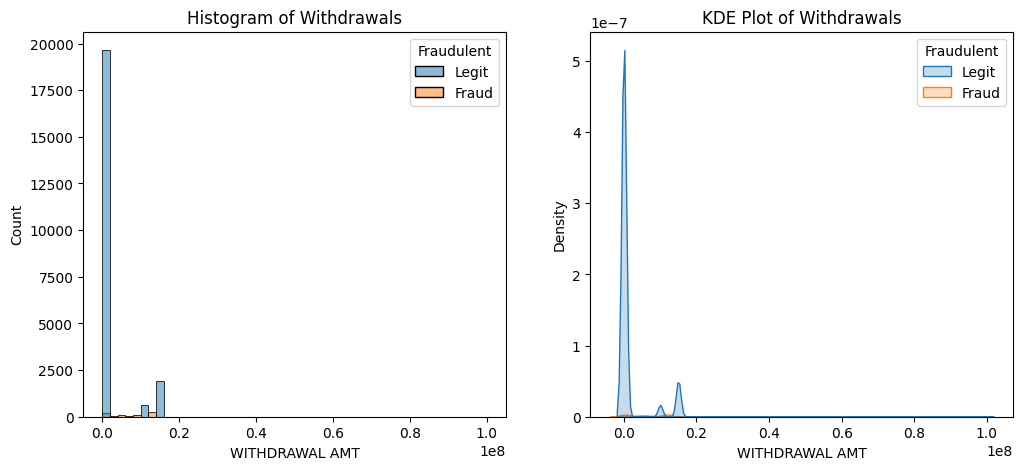

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
sns.histplot(withdrawals_general, x='WITHDRAWAL AMT', bins=50, hue='Fraudulent', ax=ax[0])
ax[0].set_title("Histogram of Withdrawals")

# KDE Plot
sns.kdeplot(data=withdrawals_general, x='WITHDRAWAL AMT', hue='Fraudulent', fill=True, ax=ax[1])
ax[1].set_title("KDE Plot of Withdrawals")

plt.show()


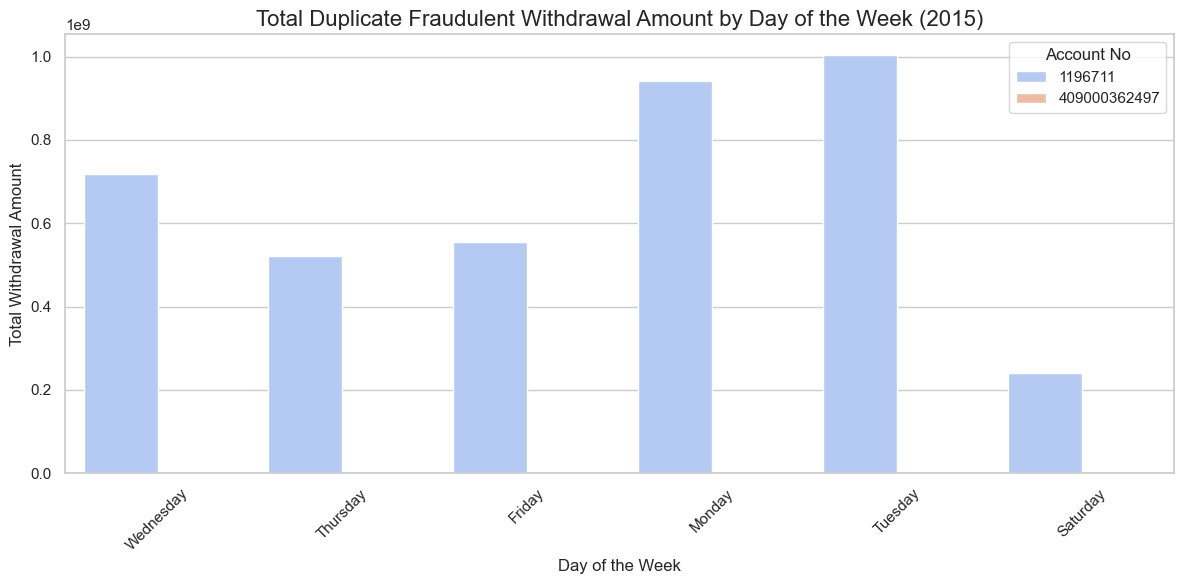

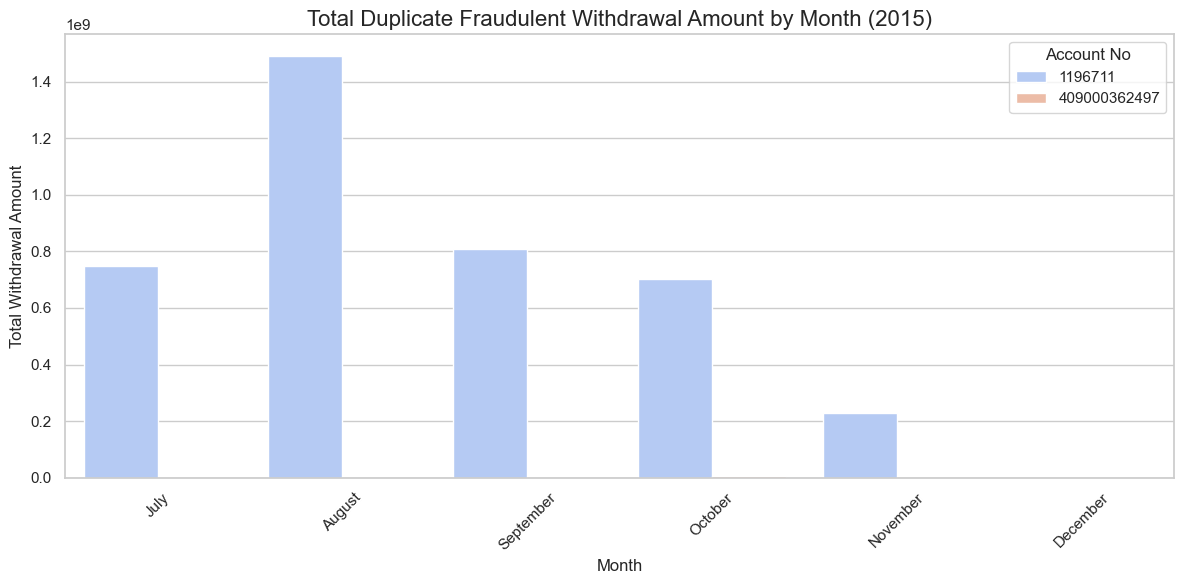

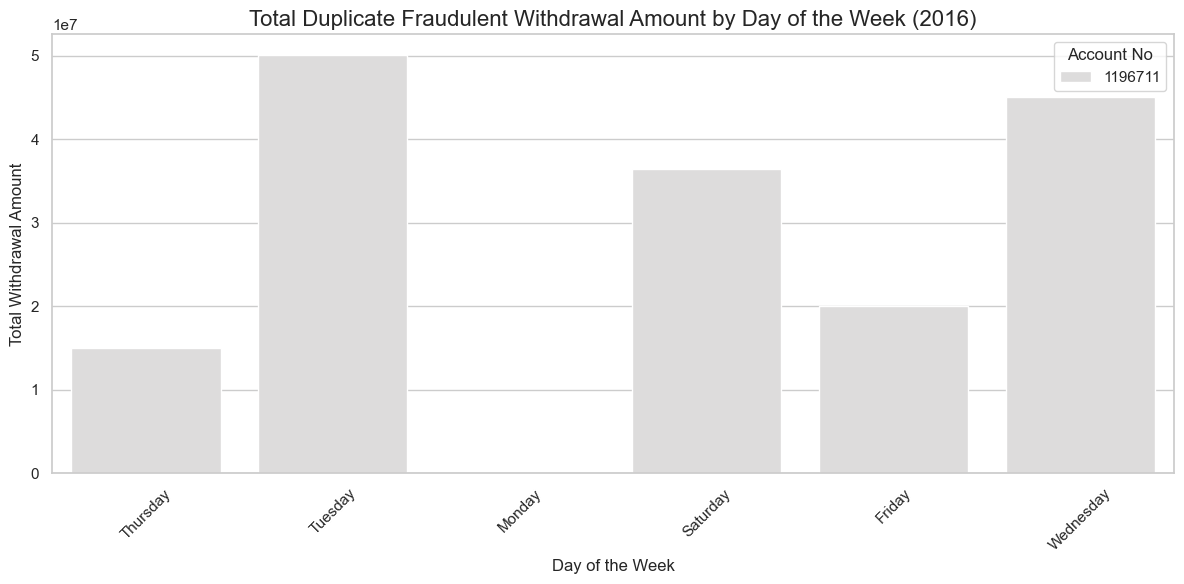

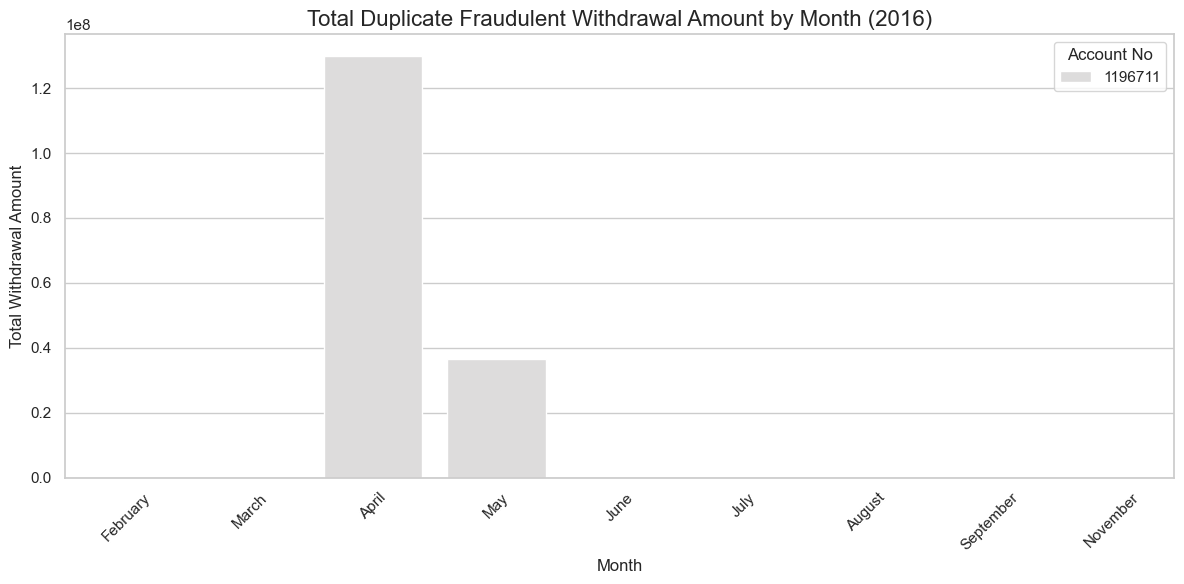

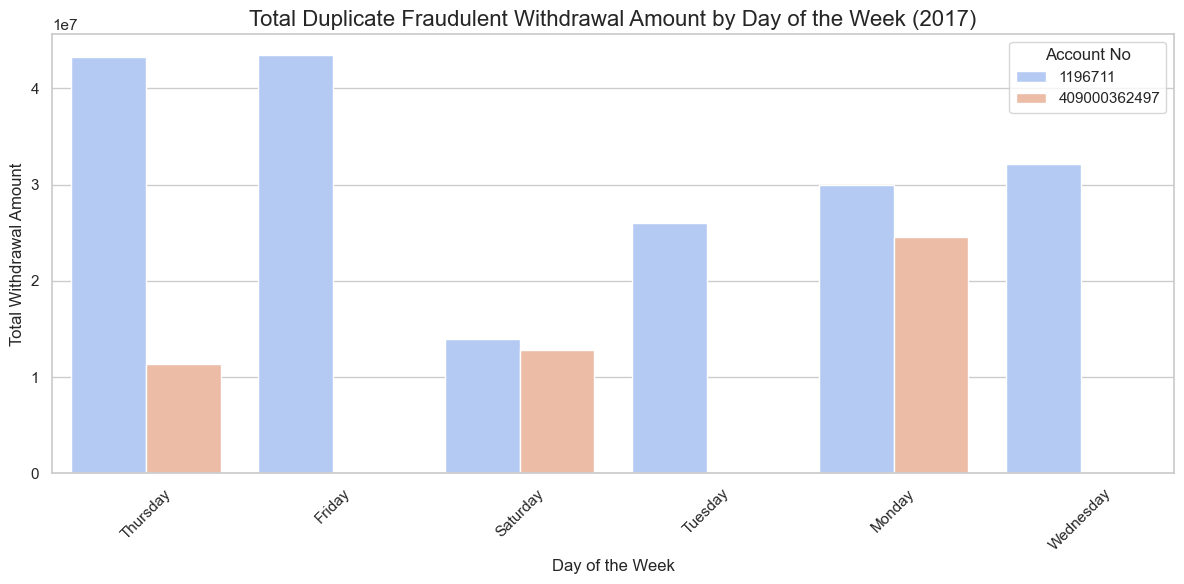

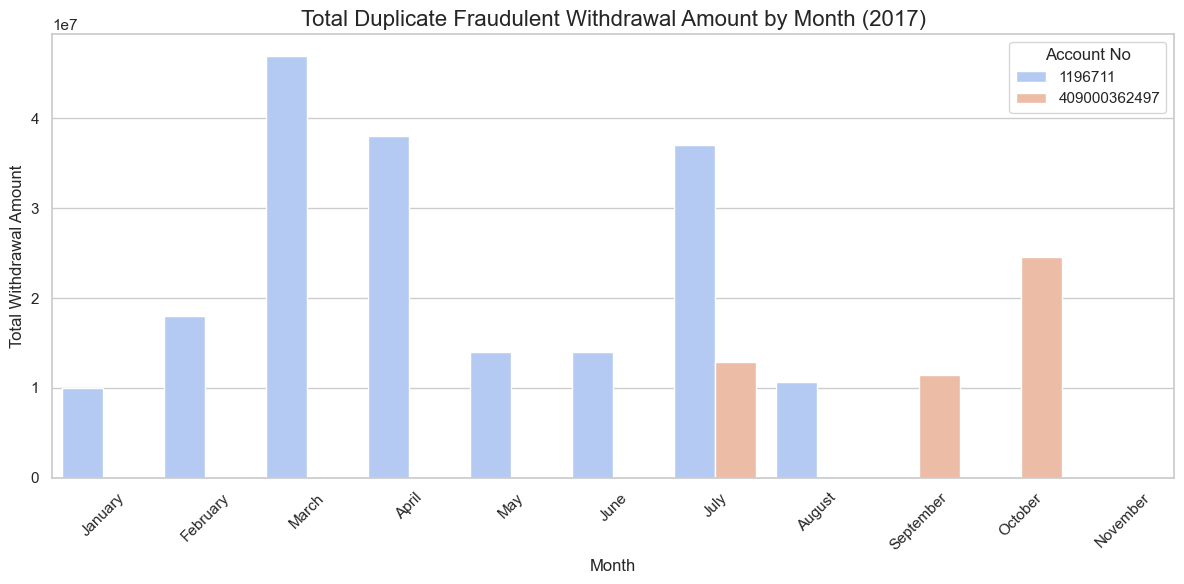

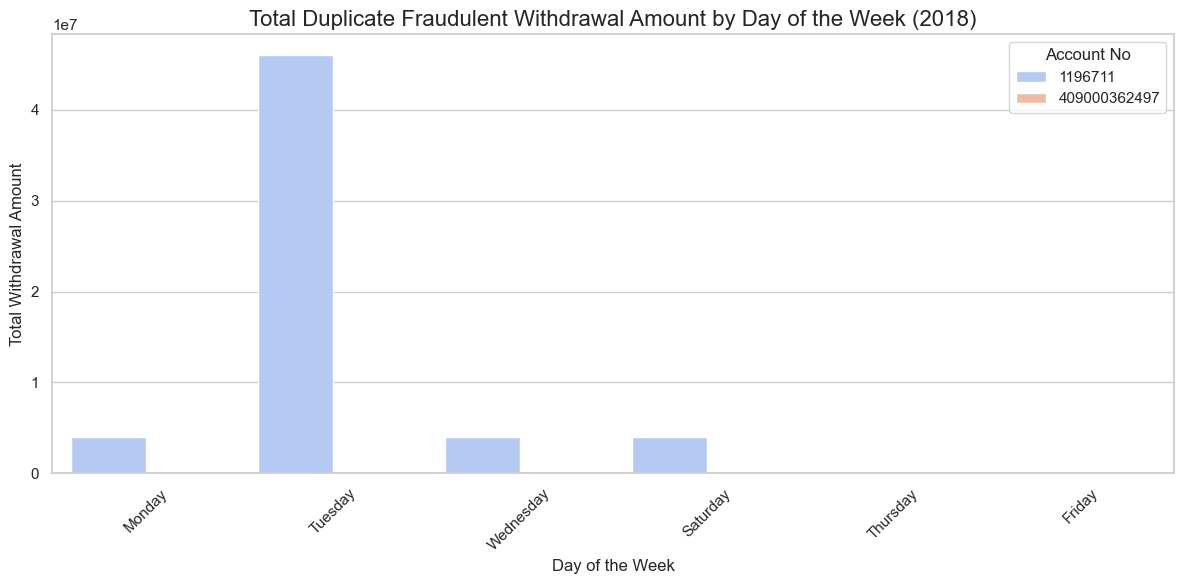

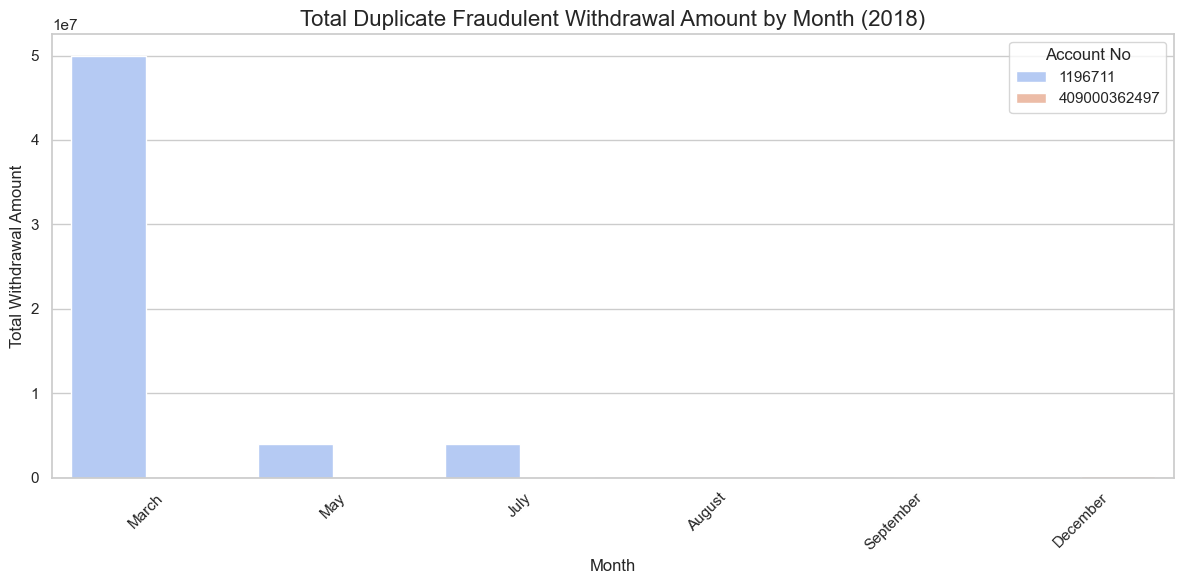

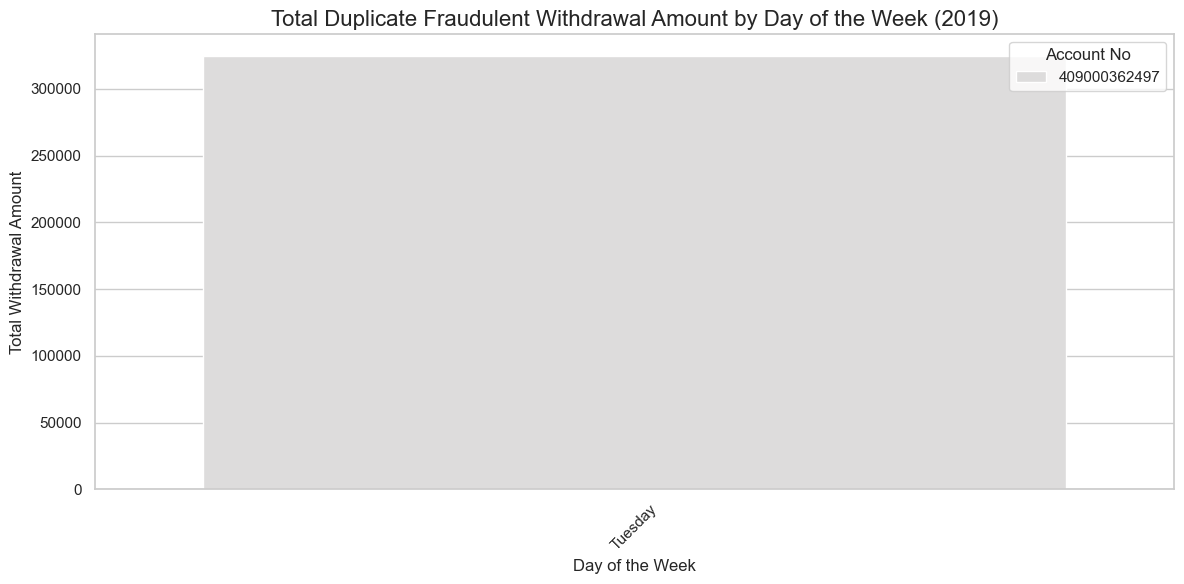

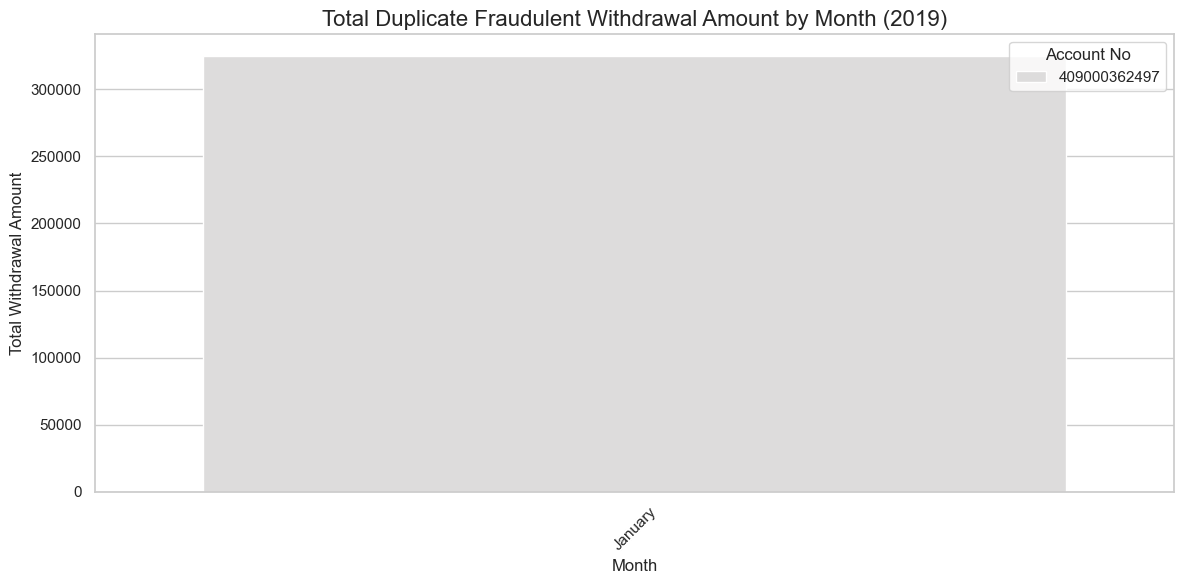

In [78]:
# Set Seaborn style
sns.set(style="whitegrid")

# Loop through each unique year in the dataset
for year in fraudulent_withdrawals['Year'].unique():
    yearly_data = fraudulent_withdrawals[fraudulent_withdrawals['Year'] == year]

    # Bar plot for withdrawal amounts by day of the week
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Day Name', y='WITHDRAWAL AMT', hue='Account No', data=yearly_data, estimator=sum, errorbar=None, palette='coolwarm')
    plt.title(f'Total Duplicate Fraudulent Withdrawal Amount by Day of the Week ({year})', fontsize=16)
    plt.xlabel('Day of the Week', fontsize=12)
    plt.ylabel('Total Withdrawal Amount', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Bar plot for withdrawal amounts by month
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Month_Name', y='WITHDRAWAL AMT', hue='Account No', data=yearly_data, estimator=sum, errorbar=None, palette='coolwarm')
    plt.title(f'Total Duplicate Fraudulent Withdrawal Amount by Month ({year})', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Withdrawal Amount', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Filtering the Rest of the data where Transaction Details are Not Equal To Zero

In [56]:
filtered_data = data[data['TRANSACTION DETAILS'] != 0]
filtered_data


,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
0,409000611074,2017-06-29,TRF FROM Indiaforensic SERVICES,0.0,2017-06-29,0.00,1000000.0,1.000000e+06,.
1,409000611074,2017-07-05,TRF FROM Indiaforensic SERVICES,0.0,2017-07-05,0.00,1000000.0,2.000000e+06,.
2,409000611074,2017-07-18,FDRL/INTERNAL FUND TRANSFE,0.0,2017-07-18,0.00,500000.0,2.500000e+06,.
3,409000611074,2017-08-01,TRF FRM Indiaforensic SERVICES,0.0,2017-08-01,0.00,3000000.0,5.500000e+06,.
4,409000611074,2017-08-16,FDRL/INTERNAL FUND TRANSFE,0.0,2017-08-16,0.00,500000.0,6.000000e+06,.
...,...,...,...,...,...,...,...,...,...
116196,409000362497,2019-03-05,TRF TO 1196428 Indiaforensic SE,0.0,2019-03-05,117934.30,0.0,-1.901902e+09,.
116197,409000362497,2019-03-05,FDRL/INTERNAL FUND TRANSFE,0.0,2019-03-05,0.00,300000.0,-1.901602e+09,.
116198,409000362497,2019-03-05,FDRL/INTERNAL FUND TRANSFE,0.0,2019-03-05,0.00,300000.0,-1.901302e+09,.
116199,409000362497,2019-03-05,IMPS 05-03-20194C,0.0,2019-03-05,109868.65,0.0,-1.901412e+09,.


<b><span style = "color:green"> Checking for Fraudulent Transactions </span></b>
---

In [59]:
import pandas as pd
from datetime import datetime

# Create a copy of the DataFrame to avoid modifying the original slice
filtered_data_copy = filtered_data.copy()

month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 
                 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Extract Day, Month, and Year into new columns
filtered_data_copy.loc[:, 'Day'] = filtered_data_copy['DATE'].dt.day
filtered_data_copy.loc[:, 'Day Name'] = filtered_data_copy['DATE'].dt.day_name()
filtered_data_copy.loc[:, 'Month'] = filtered_data_copy['DATE'].dt.month
filtered_data_copy.loc[:, 'Year'] = filtered_data_copy['DATE'].dt.year
filtered_data_copy.loc[:, 'Month_Name'] = filtered_data_copy['Month'].map(month_mapping)


In [60]:
filtered_data_copy

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.,Day,Day Name,Month,Year,Month_Name
0,409000611074,2017-06-29,TRF FROM Indiaforensic SERVICES,0.0,2017-06-29,0.00,1000000.0,1.000000e+06,.,29,Thursday,6,2017,June
1,409000611074,2017-07-05,TRF FROM Indiaforensic SERVICES,0.0,2017-07-05,0.00,1000000.0,2.000000e+06,.,5,Wednesday,7,2017,July
2,409000611074,2017-07-18,FDRL/INTERNAL FUND TRANSFE,0.0,2017-07-18,0.00,500000.0,2.500000e+06,.,18,Tuesday,7,2017,July
3,409000611074,2017-08-01,TRF FRM Indiaforensic SERVICES,0.0,2017-08-01,0.00,3000000.0,5.500000e+06,.,1,Tuesday,8,2017,August
4,409000611074,2017-08-16,FDRL/INTERNAL FUND TRANSFE,0.0,2017-08-16,0.00,500000.0,6.000000e+06,.,16,Wednesday,8,2017,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116196,409000362497,2019-03-05,TRF TO 1196428 Indiaforensic SE,0.0,2019-03-05,117934.30,0.0,-1.901902e+09,.,5,Tuesday,3,2019,March
116197,409000362497,2019-03-05,FDRL/INTERNAL FUND TRANSFE,0.0,2019-03-05,0.00,300000.0,-1.901602e+09,.,5,Tuesday,3,2019,March
116198,409000362497,2019-03-05,FDRL/INTERNAL FUND TRANSFE,0.0,2019-03-05,0.00,300000.0,-1.901302e+09,.,5,Tuesday,3,2019,March
116199,409000362497,2019-03-05,IMPS 05-03-20194C,0.0,2019-03-05,109868.65,0.0,-1.901412e+09,.,5,Tuesday,3,2019,March


In [61]:
from sklearn.ensemble import IsolationForest


# New dataset
new_iso_forest = IsolationForest(contamination=0.05, random_state=42)
filtered_data_copy['Fraud_Score'] = new_iso_forest.fit_predict(filtered_data_copy[['WITHDRAWAL AMT','DEPOSIT AMT']])
filtered_data_copy['Fraudulent'] = filtered_data_copy['Fraud_Score'].apply(lambda x: 'Fraud' if x == -1 else 'Legit')


In [62]:
filtered_data_copy

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.,Day,Day Name,Month,Year,Month_Name,Fraud_Score,Fraudulent
0,409000611074,2017-06-29,TRF FROM Indiaforensic SERVICES,0.0,2017-06-29,0.00,1000000.0,1.000000e+06,.,29,Thursday,6,2017,June,1,Legit
1,409000611074,2017-07-05,TRF FROM Indiaforensic SERVICES,0.0,2017-07-05,0.00,1000000.0,2.000000e+06,.,5,Wednesday,7,2017,July,1,Legit
2,409000611074,2017-07-18,FDRL/INTERNAL FUND TRANSFE,0.0,2017-07-18,0.00,500000.0,2.500000e+06,.,18,Tuesday,7,2017,July,1,Legit
3,409000611074,2017-08-01,TRF FRM Indiaforensic SERVICES,0.0,2017-08-01,0.00,3000000.0,5.500000e+06,.,1,Tuesday,8,2017,August,1,Legit
4,409000611074,2017-08-16,FDRL/INTERNAL FUND TRANSFE,0.0,2017-08-16,0.00,500000.0,6.000000e+06,.,16,Wednesday,8,2017,August,1,Legit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116196,409000362497,2019-03-05,TRF TO 1196428 Indiaforensic SE,0.0,2019-03-05,117934.30,0.0,-1.901902e+09,.,5,Tuesday,3,2019,March,1,Legit
116197,409000362497,2019-03-05,FDRL/INTERNAL FUND TRANSFE,0.0,2019-03-05,0.00,300000.0,-1.901602e+09,.,5,Tuesday,3,2019,March,1,Legit
116198,409000362497,2019-03-05,FDRL/INTERNAL FUND TRANSFE,0.0,2019-03-05,0.00,300000.0,-1.901302e+09,.,5,Tuesday,3,2019,March,1,Legit
116199,409000362497,2019-03-05,IMPS 05-03-20194C,0.0,2019-03-05,109868.65,0.0,-1.901412e+09,.,5,Tuesday,3,2019,March,1,Legit


In [63]:
filtered_data_copy['Fraudulent'].value_counts()

Fraudulent
Legit    108137
Fraud      5565
Name: count, dtype: int64

In [64]:
fraudulent_fulldataset = filtered_data_copy[filtered_data_copy['Fraudulent']=='Fraud']
fraudulent_fulldataset

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.,Day,Day Name,Month,Year,Month_Name,Fraud_Score,Fraudulent
2926,409000425051,2018-10-31,TRF TO Myur Joshi,0.0,2018-10-31,354000000.0,0.0,-3.535408e+08,.,31,Wednesday,10,2018,October,-1,Fraud
2939,409000405747,2016-01-30,TRF TO Maur Joshi,0.0,2016-01-30,170000000.0,0.0,-5.267348e+08,.,30,Saturday,1,2016,January,-1,Fraud
2940,409000405747,2016-01-30,TRF TO Indiaforensic SERVICES IN,0.0,2016-01-30,30000000.0,0.0,-5.567348e+08,.,30,Saturday,1,2016,January,-1,Fraud
2950,409000405747,2016-05-03,TRF FROM Indiaforensic SERVICES,0.0,2016-05-03,0.0,202100000.0,-3.566520e+08,.,3,Tuesday,5,2016,May,-1,Fraud
2972,409000405747,2018-09-28,Payments For : 9090000577,0.0,2018-09-28,103020294.2,0.0,-5.467348e+08,.,28,Friday,9,2018,September,-1,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113647,409000362497,2018-07-19,TRF FROM Indiaforensic SERVICES,0.0,2018-07-19,0.0,7500000.0,-1.903326e+09,.,19,Thursday,7,2018,July,-1,Fraud
113713,409000362497,2018-07-20,FDRL/INTERNAL FUND TRANSFE,0.0,2018-07-20,0.0,8000000.0,-1.898291e+09,.,20,Friday,7,2018,July,-1,Fraud
113956,409000362497,2018-08-09,FDRL/INTERNAL FUND TRANSFE,0.0,2018-08-09,0.0,8000000.0,-1.896415e+09,.,9,Thursday,8,2018,August,-1,Fraud
114125,409000362497,2018-08-21,FDRL/INTERNAL FUND TRANSFE,0.0,2018-08-21,0.0,8000000.0,-1.896105e+09,.,21,Tuesday,8,2018,August,-1,Fraud


In [65]:
fraudulent_fulldataset['Account No'].value_counts()

Account No
409000362497    2539
1196428         1287
1196711          927
409000438620     758
409000438611      48
409000405747       5
409000425051       1
Name: count, dtype: int64

**Visualizations of Fraudulent Account Nos or Customers' Frequency**
---

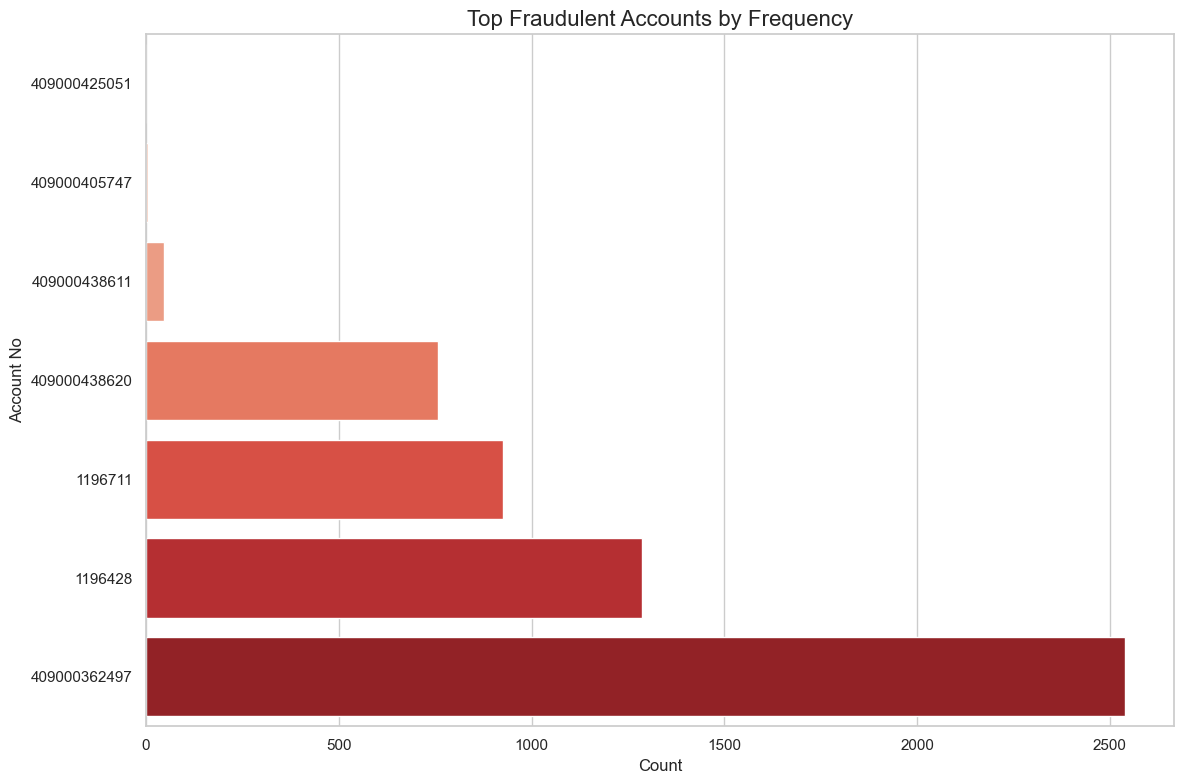

Account No
409000362497    2539
1196428         1287
1196711          927
409000438620     758
409000438611      48
409000405747       5
409000425051       1
Name: count, dtype: int64


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each fraudulent account
fraudulent_account_counts = fraudulent_fulldataset['Account No'].value_counts()

# Convert to DataFrame for better handling
fraudulent_account_counts_df = fraudulent_account_counts.reset_index()
fraudulent_account_counts_df.columns = ["Account No", "Count"]

# Sort the DataFrame from highest to lowest count
fraudulent_account_counts_df = fraudulent_account_counts_df.sort_values(by="Count", ascending=False)

# Plot the distribution
plt.figure(figsize=(12, 8))
sns.barplot(
    data=fraudulent_account_counts_df.head(20),  # Display top 20 fraudulent accounts
    y="Account No",
    x="Count",
    hue="Account No",  # Assign hue to avoid the FutureWarning
    dodge=False,  # Ensure bars remain aligned
    palette="Reds_r",
    legend=False  # Disable legend to avoid redundancy
)

# Labels and title
plt.xlabel("Count", fontsize=12)
plt.ylabel("Account No", fontsize=12)
plt.title("Top Fraudulent Accounts by Frequency", fontsize=16)
plt.gca().invert_yaxis()  # Highest count on top
plt.tight_layout()
plt.show()

# Display the full sorted count list
print(fraudulent_account_counts)


In [67]:
fraudulent_withdrawals_sum = fraudulent_fulldataset.groupby("Account No", as_index=False)["WITHDRAWAL AMT"].sum()
fraudulent_withdrawals_sum

,Account No,WITHDRAWAL AMT
0,1196428,4.741865e+08
1,1196711,4.366485e+09
2,409000362497,8.142488e+10
3,409000405747,3.030203e+08
4,409000425051,3.540000e+08
5,409000438611,4.436596e+08
6,409000438620,7.803184e+09


In [68]:
fraudulent_deposits_sum = fraudulent_fulldataset.groupby("Account No", as_index=False)["DEPOSIT AMT"].sum()
fraudulent_deposits_sum

,Account No,DEPOSIT AMT
0,1196428,3.220991e+10
1,1196711,1.473599e+10
2,409000362497,8.398054e+09
3,409000405747,2.096000e+08
4,409000425051,0.000000e+00
5,409000438611,6.547824e+08
6,409000438620,1.560049e+10


In [69]:
fraudulent_fulldataset['WITHDRAWAL AMT'].sum()

95169419788.07

In [70]:
fraudulent_fulldataset['DEPOSIT AMT'].sum()

71808818764.68

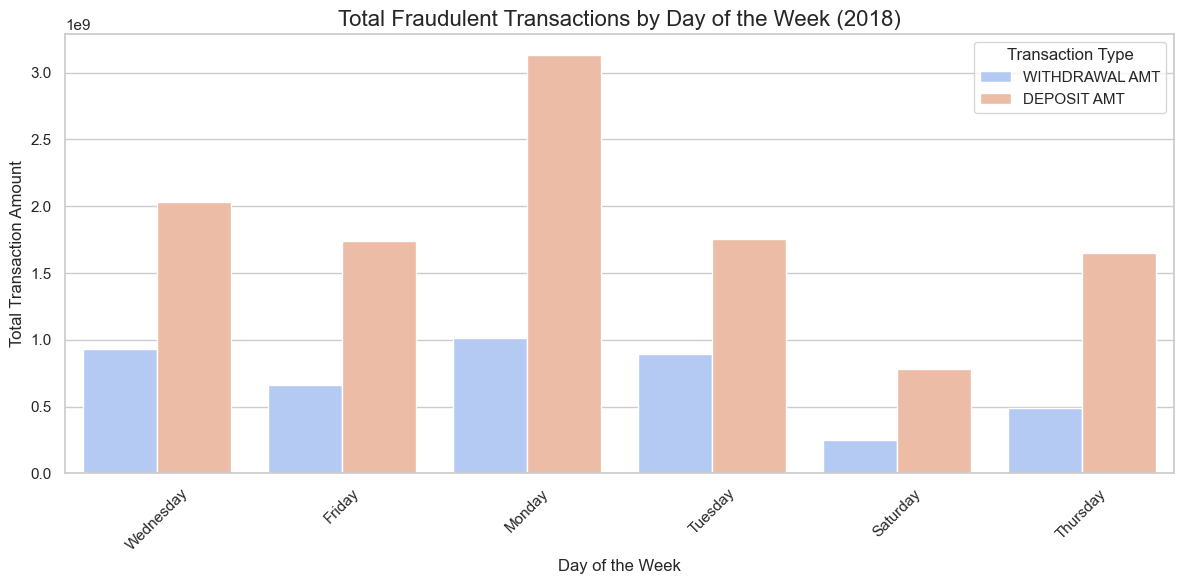

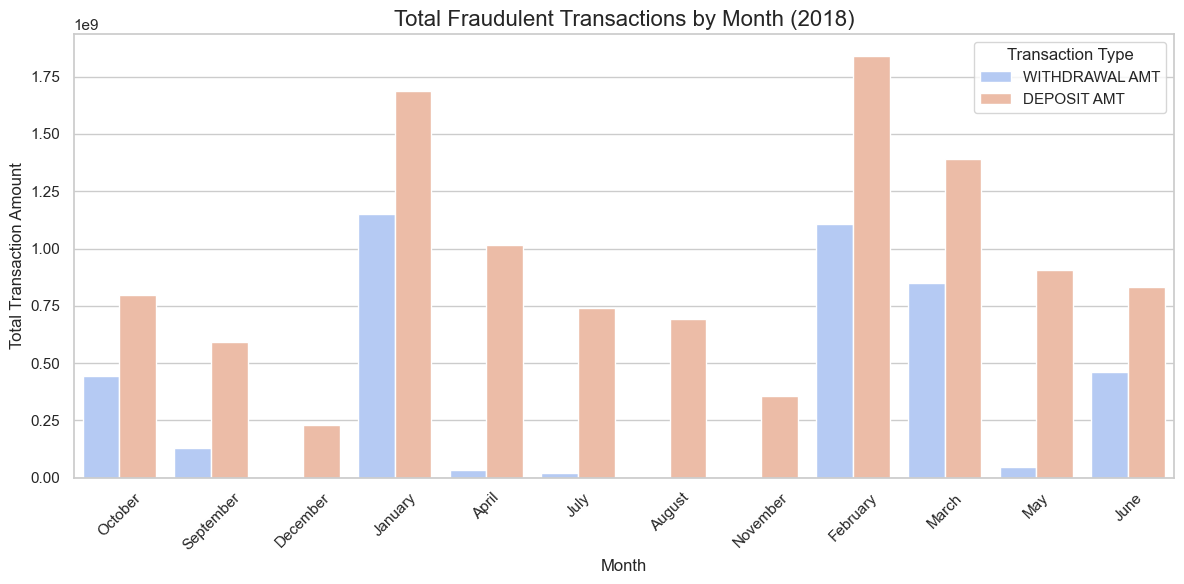

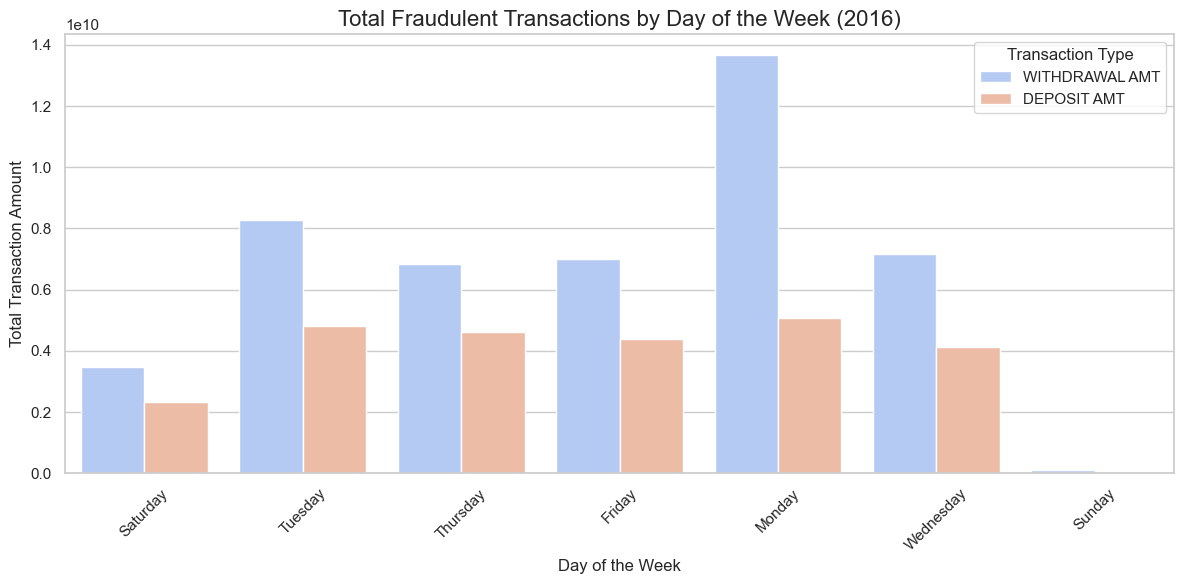

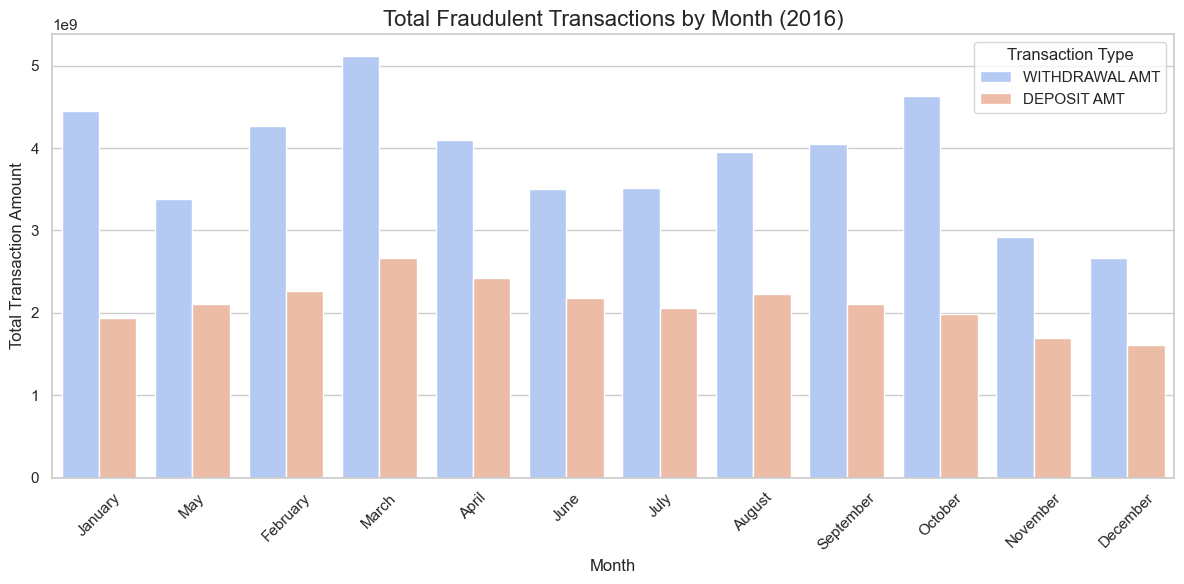

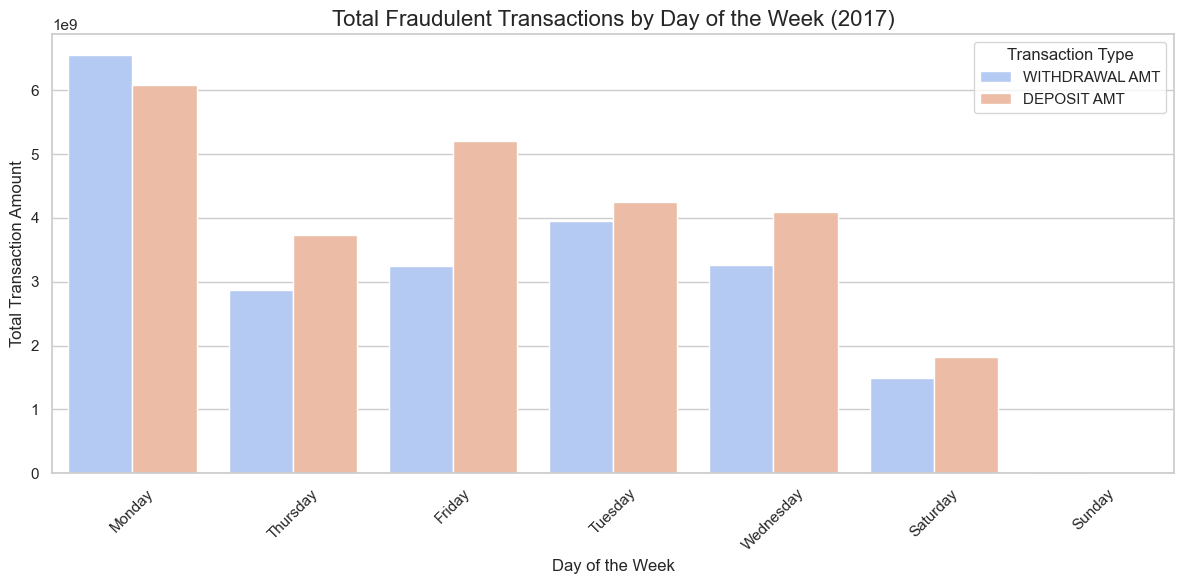

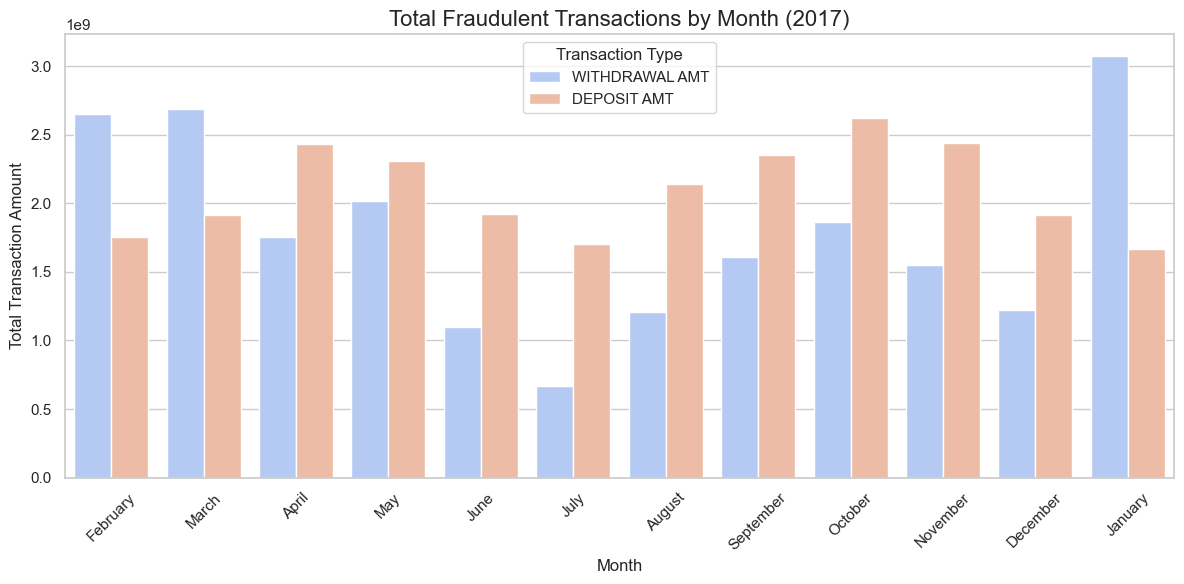

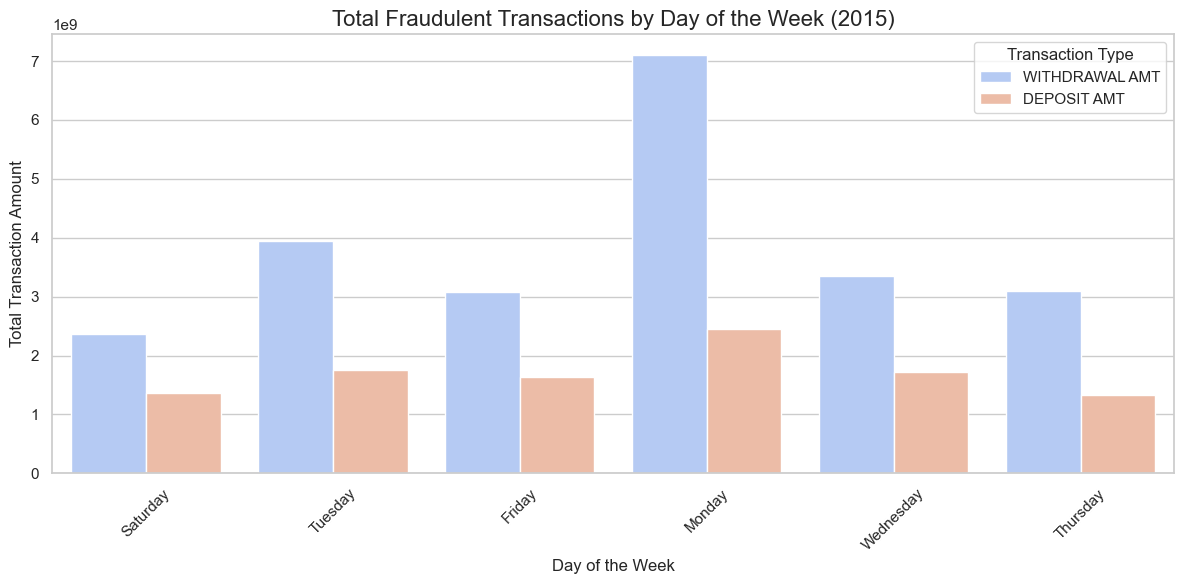

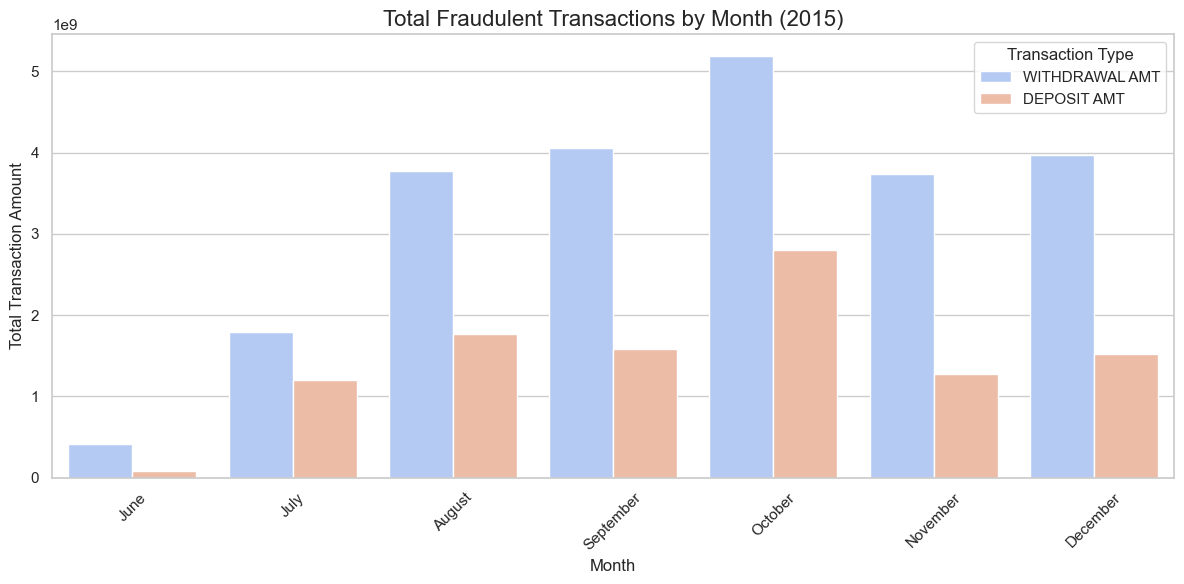

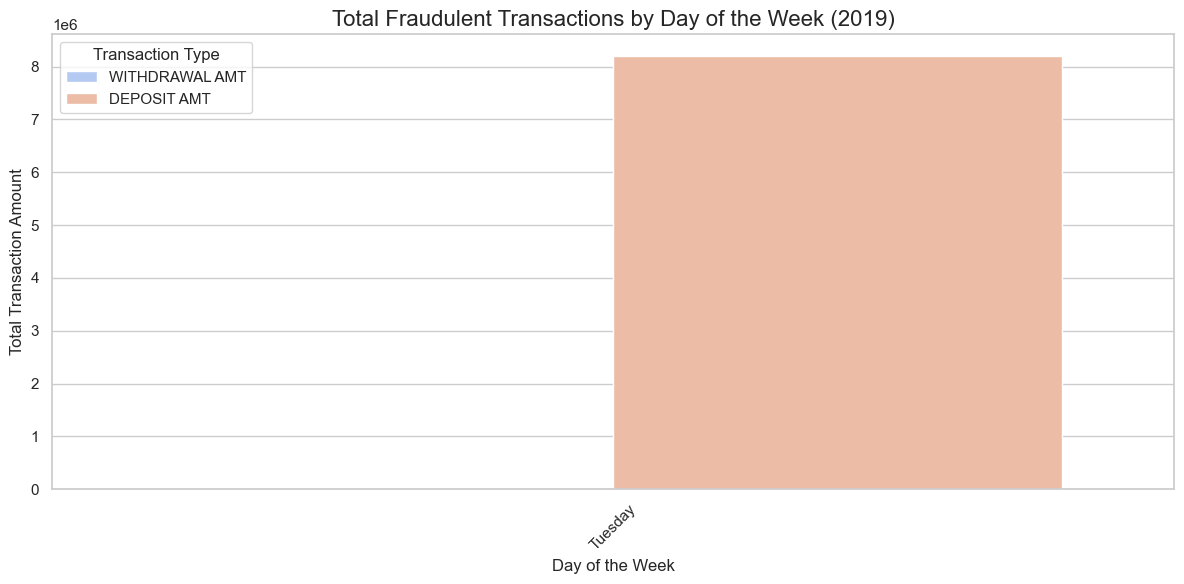

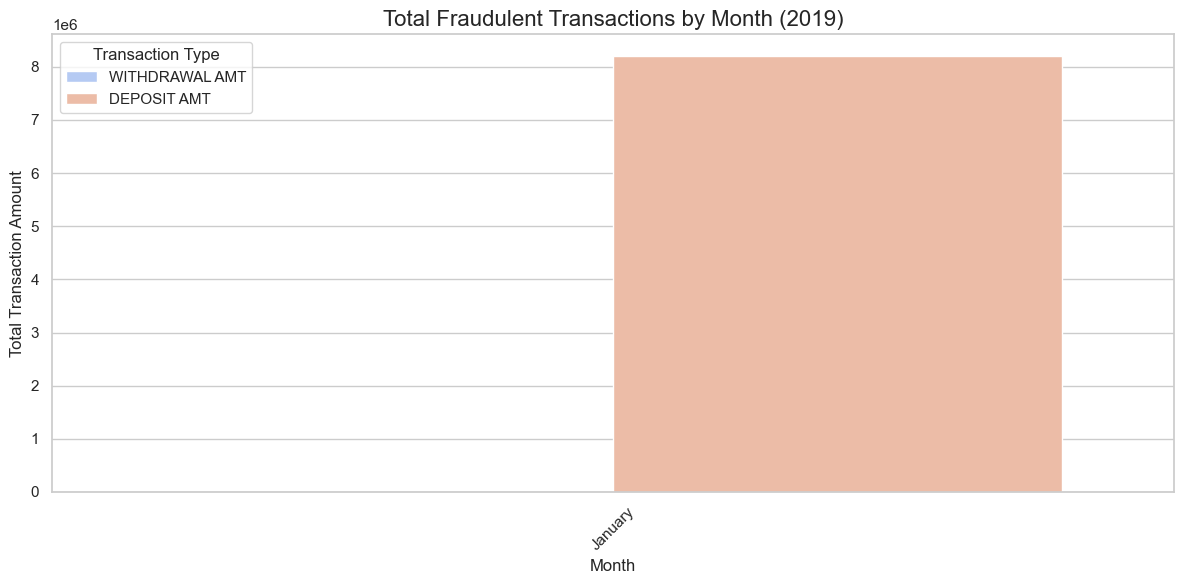

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Loop through each unique year in the dataset
for year in fraudulent_fulldataset['Year'].unique():
    yearly_data = fraudulent_fulldataset[fraudulent_fulldataset['Year'] == year]

    # Reshape data to long format for easier plotting
    melted_data = yearly_data.melt(id_vars=['Day Name', 'Month_Name', 'Account No'], 
                                   value_vars=['WITHDRAWAL AMT', 'DEPOSIT AMT'], 
                                   var_name='Transaction Type', 
                                   value_name='Amount')

    # Bar plot for total fraudulent transactions by day of the week
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Day Name', y='Amount', hue='Transaction Type', data=melted_data, 
                estimator=sum, errorbar=None, palette='coolwarm')
    plt.title(f'Total Fraudulent Transactions by Day of the Week ({year})', fontsize=16)
    plt.xlabel('Day of the Week', fontsize=12)
    plt.ylabel('Total Transaction Amount', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Bar plot for total fraudulent transactions by month
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Month_Name', y='Amount', hue='Transaction Type', data=melted_data, 
                estimator=sum, errorbar=None, palette='coolwarm')
    plt.title(f'Total Fraudulent Transactions by Month ({year})', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Transaction Amount', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


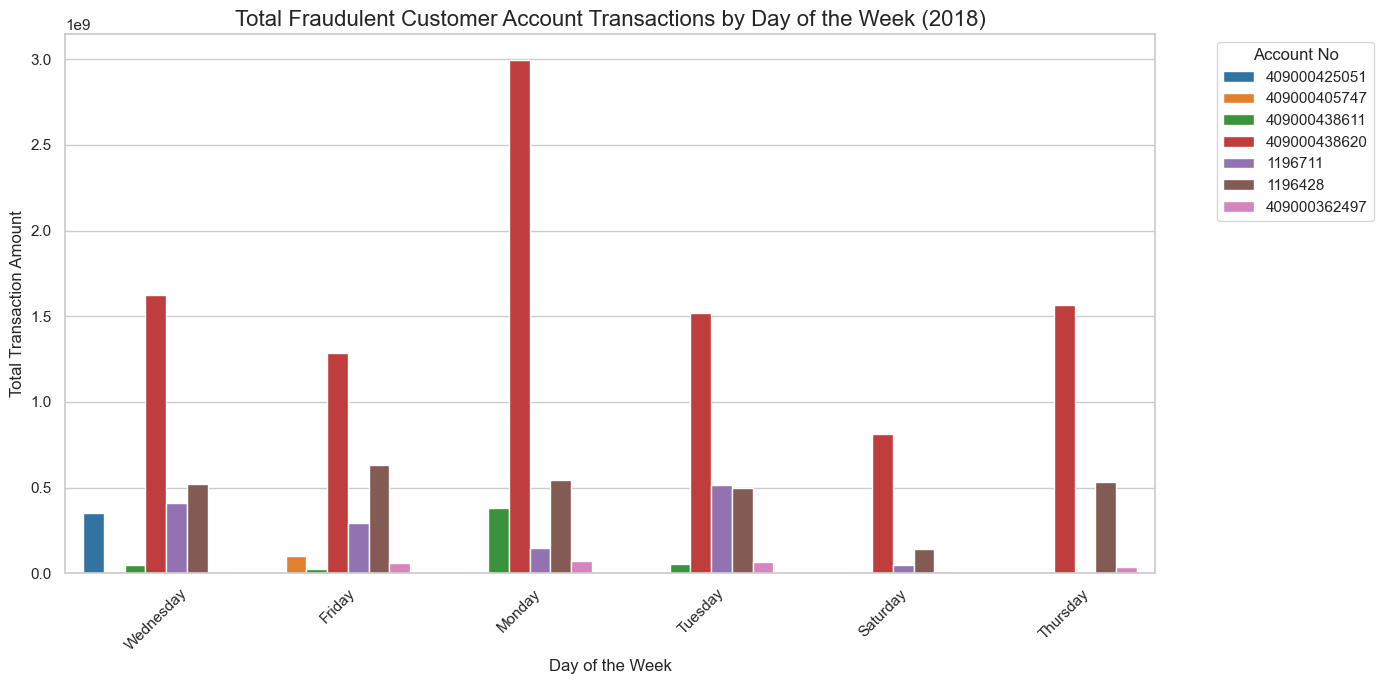

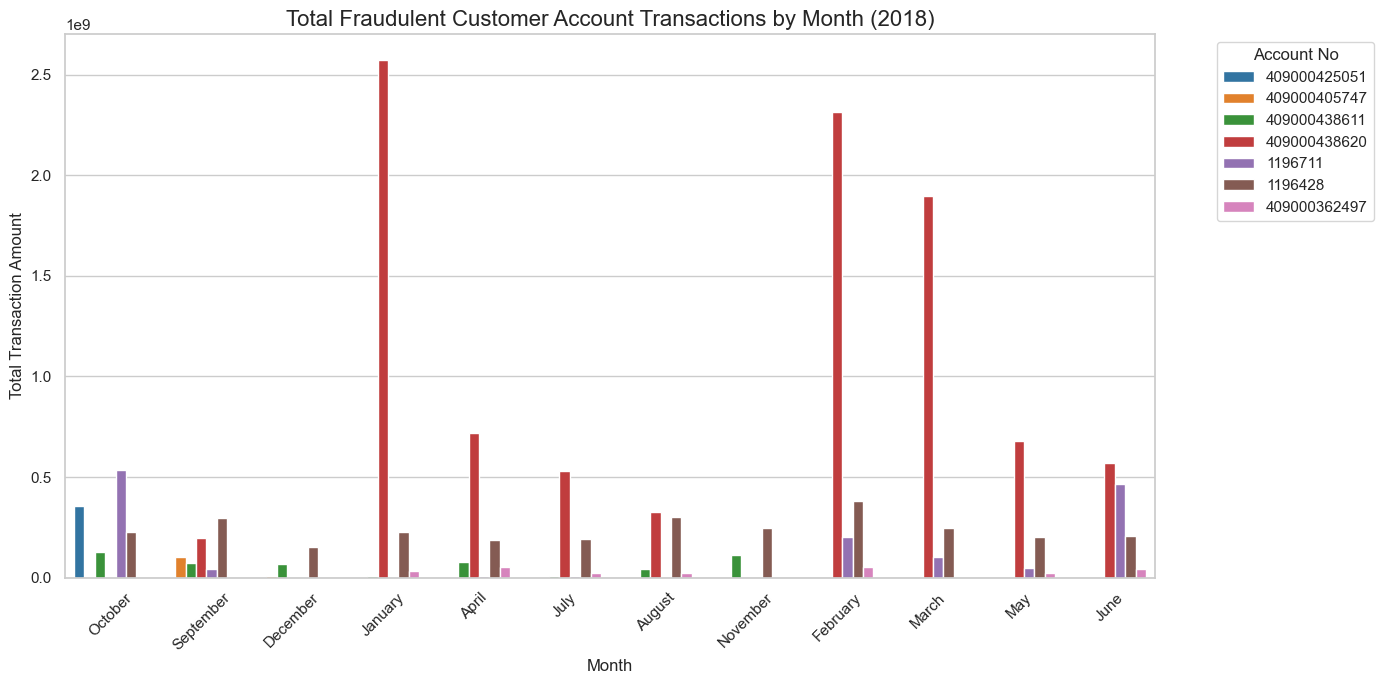

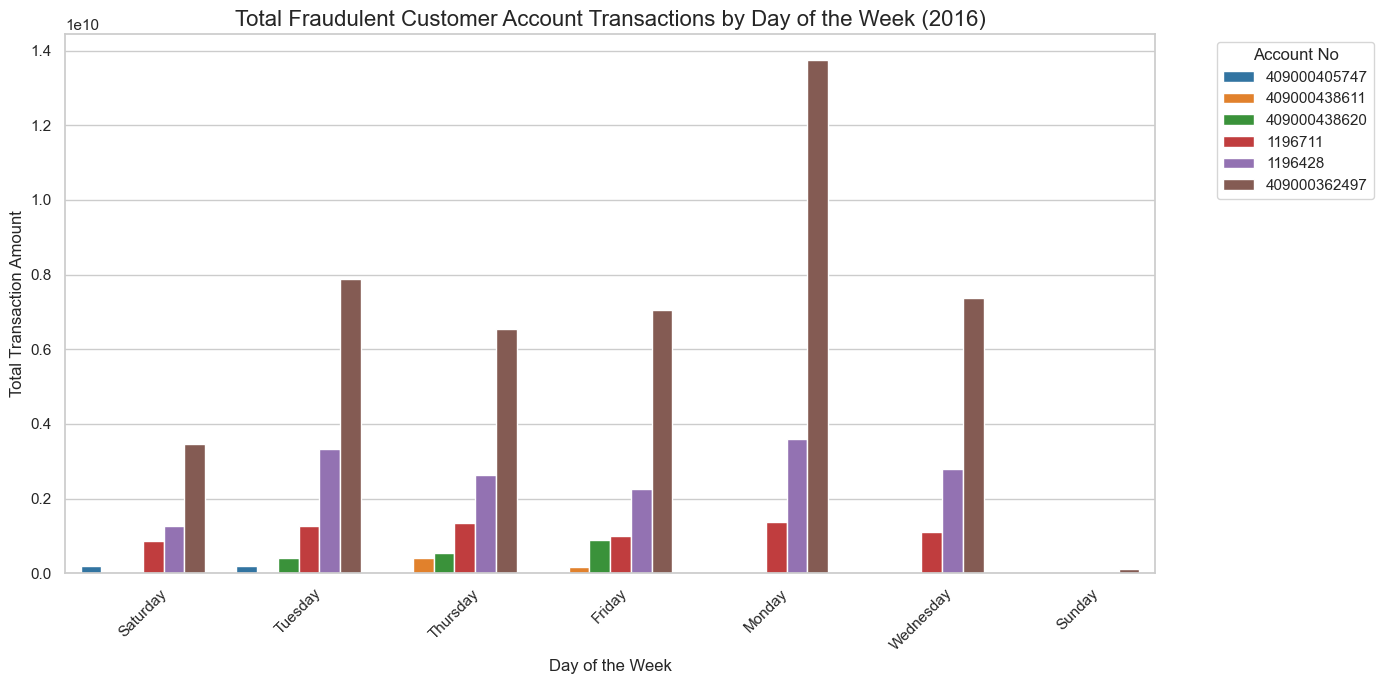

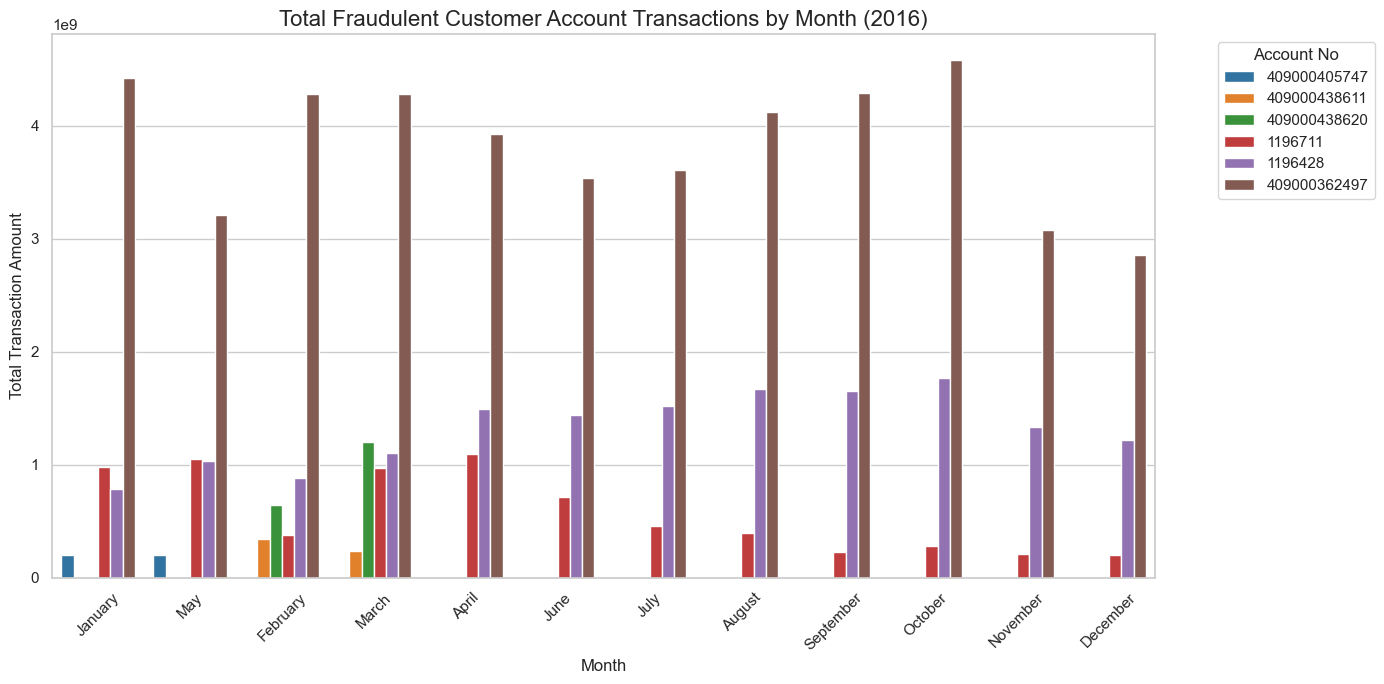

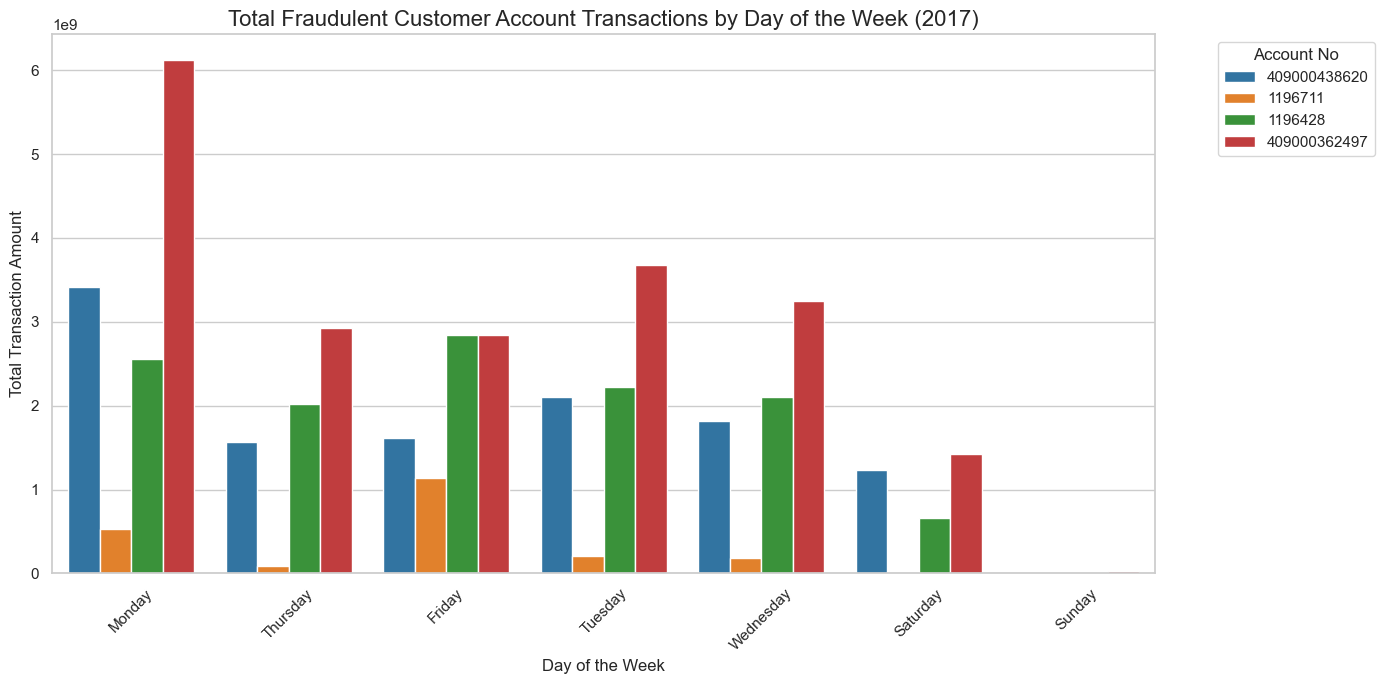

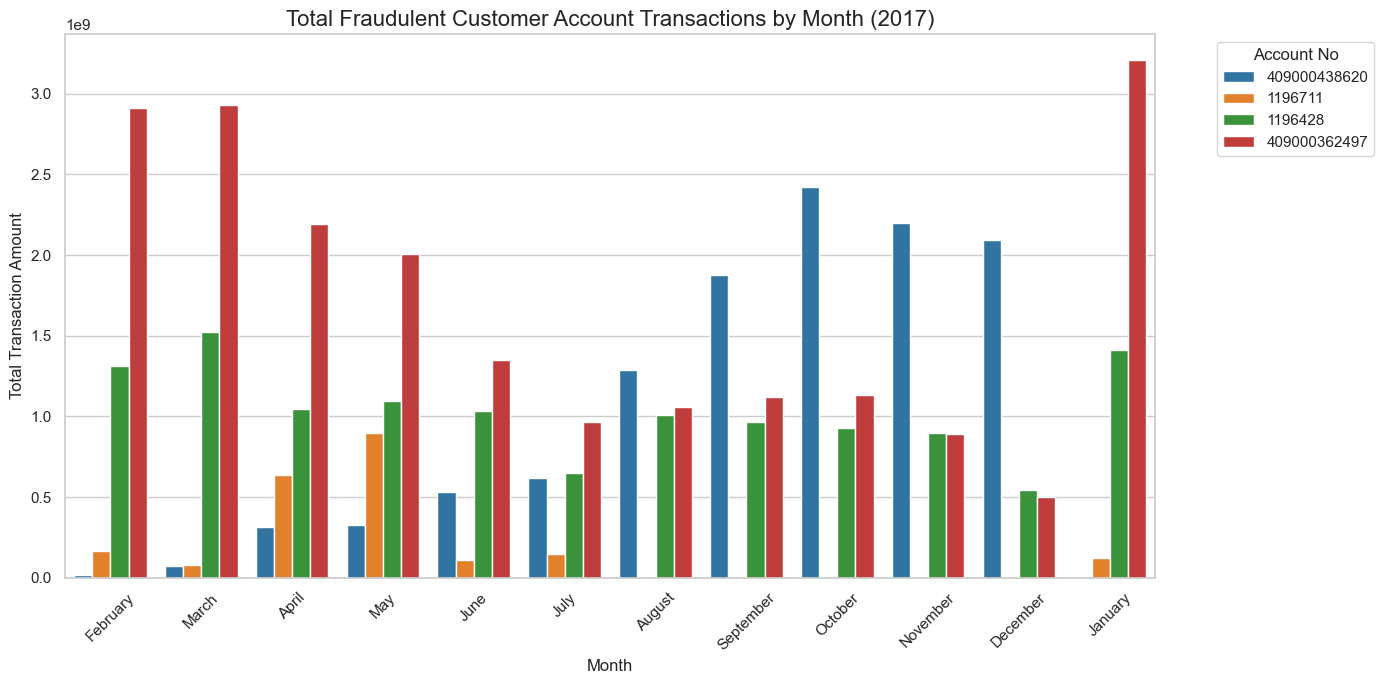

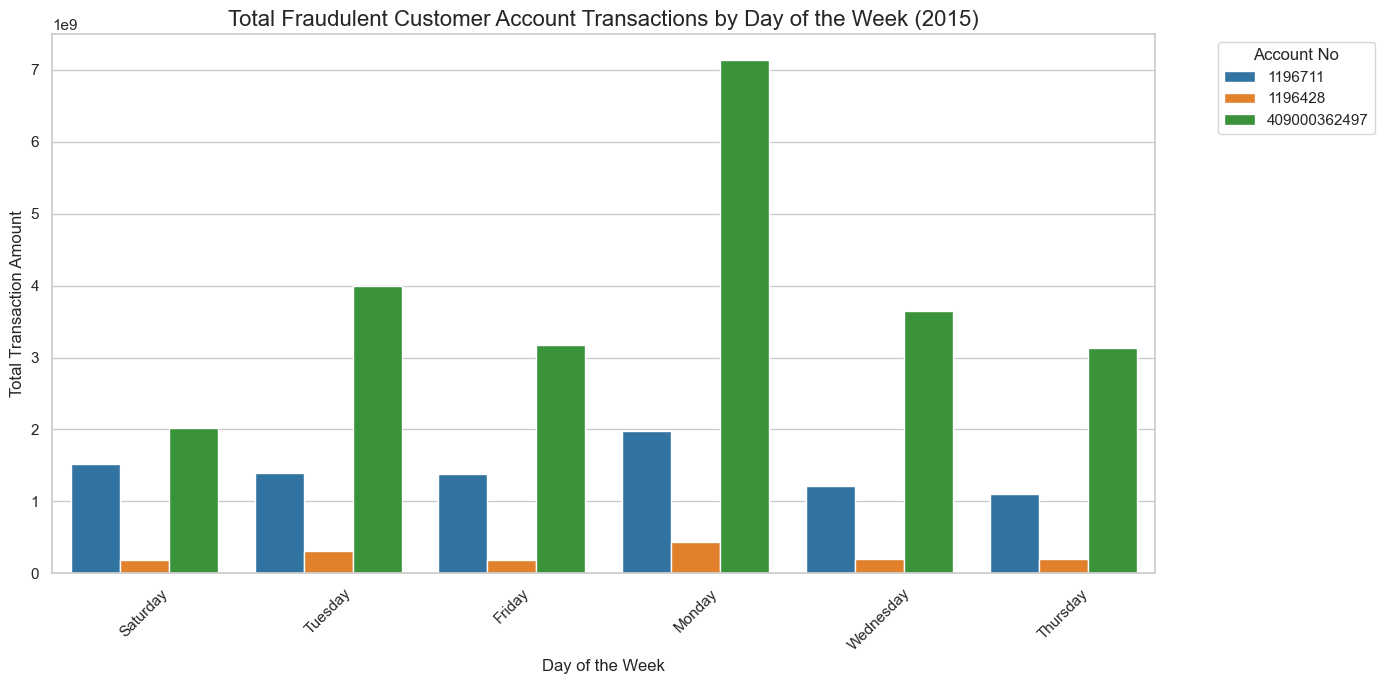

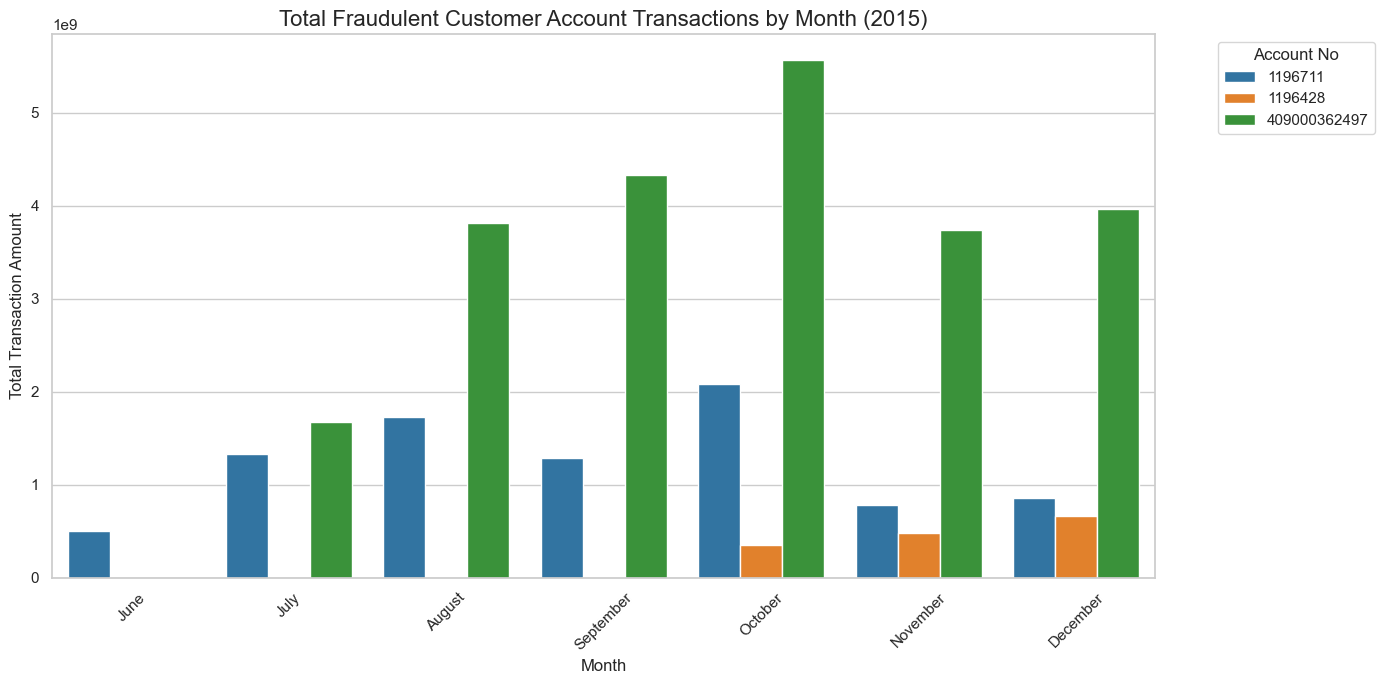

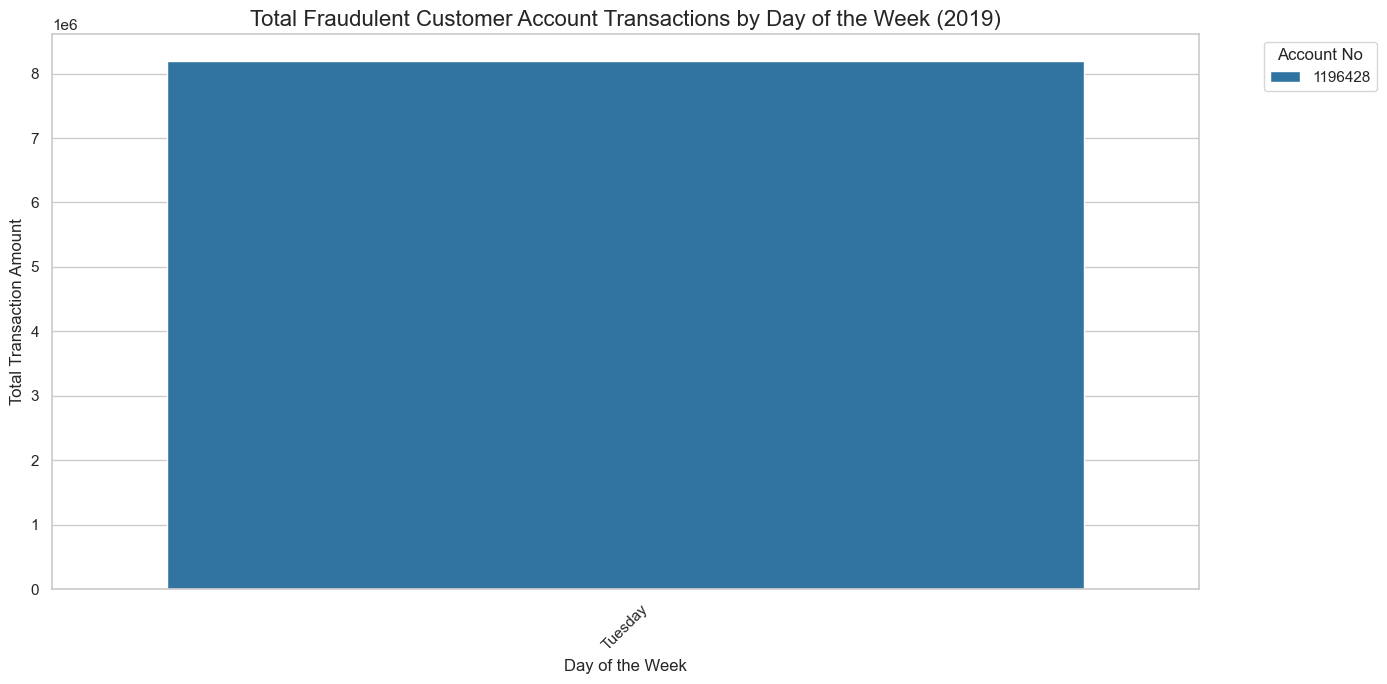

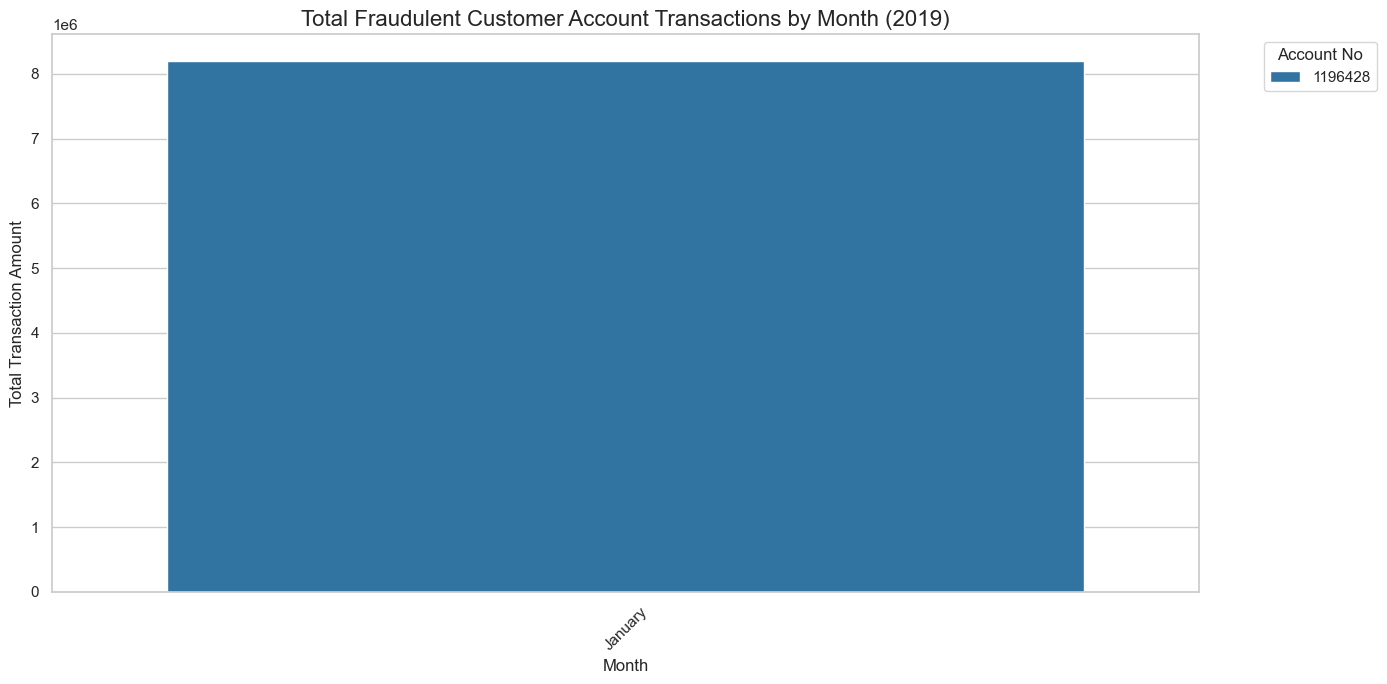

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Loop through each unique year in the dataset
for year in fraudulent_fulldataset['Year'].unique():
    yearly_data = fraudulent_fulldataset[fraudulent_fulldataset['Year'] == year]

    # Reshape data to long format for easier plotting
    melted_data = yearly_data.melt(id_vars=['Day Name', 'Month_Name', 'Account No'], 
                                   value_vars=['WITHDRAWAL AMT', 'DEPOSIT AMT'], 
                                   var_name='Transaction Type', 
                                   value_name='Amount')

    # Bar plot for fraudulent transactions by day of the week, grouped by Account No
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Day Name', y='Amount', hue='Account No', data=melted_data, 
                estimator=sum, errorbar=None, palette='tab10')
    plt.title(f'Total Fraudulent Customer Account Transactions by Day of the Week ({year})', fontsize=16)
    plt.xlabel('Day of the Week', fontsize=12)
    plt.ylabel('Total Transaction Amount', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Account No", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Bar plot for fraudulent transactions by month, grouped by Account No
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Month_Name', y='Amount', hue='Account No', data=melted_data, 
                estimator=sum, errorbar=None, palette='tab10')
    plt.title(f'Total Fraudulent Customer Account Transactions by Month ({year})', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Transaction Amount', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Account No", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


<b><span style='color:green'>Summary Report</span><b>
---


<h4><b></b><span style = 'color:brown'> Project Summary and Insights </b></span> </h4>



**The project discovered <span style= 'color:blue'>seven potentially fraudulent accounts</span>:**

<b><span style= 'color:lightgreen'>1196428, 1196711, 409000362497, 409000405747, 409000425051, 409000438611, and 409000438620.</span></b>

The total amount **<span style= 'color:blue'>withdrawn</span>** from these accounts was **<span style= 'color:blue'>95,169,419,788.07.</span>** The account with the **highest** amount of **withdrawals was 409000362497**, with a total of **81,424,880,000.** The account with the **second highest** amount of withdrawals was **409000438620**, with a total of **7,803,184,000.**

The total amount **<span style= 'color:blue'>deposited</span>** into these accounts was **<span style= 'color:blue'>71,808,818,764.68.</span>** The account with the **highest amount** of **deposits** was **409000362497**, with a total of **8,398,054,000**. The account with the **second highest** amount of deposits was **409000438620**, with a total of **15,600,490,000**.

It is worth noting that the account with the **<span style= 'color:blue'>highest amount of withdrawals</span>** also had **<span style= 'color:blue'>the highest amount of deposits</span>**. This could suggest that this account was being used for **<span style= 'color:blue'>money laundering.</span>**

The project also found that the most common <b><span style= 'color:blue'>fraudulent transaction</span></b> type was **"TRF FROM Indiaforensic SERVICES".** This could suggest that this company was involved in **fraudulent activities.**

Overall, the project discovered a significant amount of potentially fraudulent activity. The findings of this project could be used to **develop more effective fraud prevention strategies.**



